# Multi-Class Prediction of Obesity Risk Dataset 📊


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring Data:

In [ ]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/Multi-Class Prediction of Obesity Risk/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Multi-Class Prediction of Obesity Risk/playground-series-s4e2/test.csv')

# Load the sample submission
sample_submission = pd.read_csv('/content/drive/MyDrive/Multi-Class Prediction of Obesity Risk/playground-series-s4e2/sample_submission.csv')

In [ ]:
# Display the first few rows of the train_data and test_data
display('Train:', train_data.head())
display('Test:', test_data.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
#Drop columns 'id'
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [ ]:
# Print the new dimension of the train_data and test_data
display('Train:', train_data.tail())
display('Test:', test_data.tail())

'Train:'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


'Test:'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.00000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.00000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.27374,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.00000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation
13839,Male,26.490926,1.812259,120.980508,yes,yes,2.744994,3.00000,Sometimes,no,2.205977,no,1.304291,0.630866,Sometimes,Public_Transportation


In [ ]:
# Check the shape of the train_data
train_data.shape

(20758, 17)

In [ ]:
# Check the shape of the test_data
test_data.shape

(13840, 16)

**Dataset Dimensions**

-	The training dataset `train_data` contains 20,758 entries and 17 features.
-	The testing dataset `test_data` consists of 13,840 entries but only has 16 features, which is expected since it likely does not include the target variable `NObeyesdad`.

In [ ]:
# Display the columns in the train_data
train_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**Feature Composition Examination:**

- The dataset encapsulates a diverse array of attributes potentially influencing obesity levels, including, but not limited to, demographic specifics (`Gender`, `Age`), physical metrics (`Height`, `Weight`), familial obesity history (`family_history_with_overweight`), dietary practices (`FAVC`, `FCVC`, `NCP`, `CAEC`), lifestyle determinants (`SMOKE`, `CH2O`, `SCC`, `FAF`, `TUE`, `CALC`), transportation methods (`MTRANS`), and the focal variable `NObeyesdad`.

In [ ]:
# Display the number of unique values in each column of the train_data
train_data.nunique()

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

**Unique Value Counts in Each Column**

Subsequent analyses shed light on the dataset's variegated and distributive properties, crucial for predictive modeling of obesity levels.

1.	Binary and Categorical Variables:
  -	Binary Variables: `Gender`, `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`.
  -	Categorical Variables: `CAEC`, `CALC`, `MTRANS`.

2.	Numerical Variables with High Cardinality:
  -	Continuous Variables: `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`.
3.	Target Variable:
  -	`NObeyesdad` with 7 unique values, indicating a multi-class classification problem.

In [ ]:
# Check for missing values in the train_data
train_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Missing Values**    
- No missing values are observed across all columns in `train_data`.

In [ ]:
# Check for duplicate values in train_data
if train_data.duplicated().sum() == 0:
    print("There's no duplicate value in train_data.")
else:
    print("Total duplicate value in train_data: ", train_data.duplicated().sum())

There's no duplicate value in train_data.


**Duplicate Values**  
- There are no duplicate values in `train_data`.

In [ ]:
# Display summary information about the train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

**Dataset Information**

The `.info()` method provides a comprehensive view of `train_data`, highlighting feature types, absence of missing values, and memory usage.
  
1.	Feature Types:
  -	Numerical Features (8): `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`.
  -	Categorical Features (9): `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, `NObeyesdad`.
2.	No Missing Values: Facilitates streamlined preprocessing without imputation.
3.	Data Type Considerations: Essential for formulating preprocessing strategies for numerical and categorical variables.
4.	Memory Usage: A modest 2.7 MB, ensuring efficient data manipulation and model training.

In [ ]:
# Display descriptive statistics for numerical columns
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


**Descriptive Statistics**

1.	Age: The participants range from 14 to 61 years old, with a mean age of approximately 23.84 years. The relatively young median age (22.82) suggests a skewed distribution towards younger individuals.
2.	Height: Heights range from 1.45 to 1.975 meters, with an average height of 1.7 meters. The data shows relatively low variability (standard deviation of 0.087), indicating that most participants have heights close to the average.
3.	Weight: Weights vary significantly, from 39 to 165.06 kg, with a mean weight of 87.89 kg. The wide range and higher standard deviation (26.38) reflect diverse body weights among participants.
4.	FCVC (Frequency of Consumption of Vegetables): On a scale of 1 to 3, the average frequency of vegetable consumption is about 2.45, suggesting a moderate to high vegetable intake among participants.
5.	NCP (Number of Main Meals): Most participants report consuming around 3 main meals per day, with a small standard deviation indicating consistency in meal frequency.
6.	CH2O (Consumption of Water Daily): Daily water consumption averages around 2 liters, with some variability in how much participants drink.
7.	FAF (Physical Activity Frequency): Physical activity frequency varies widely among participants, from 0 to 3 times per week, with a mean close to 1. This indicates a mixed level of physical activity across the dataset.
8.	TUE (Time Using Technology Devices): Time spent using technology devices also shows considerable variation but leans towards lower values, with a median less than 1 hour per day.


# Exploratory Data Analysis

## Target Variables:

<ipython-input-16-148582313f43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=NObeyesdad_counts, y=NObeyesdad_counts.index, ax=axes[0], palette='husl')


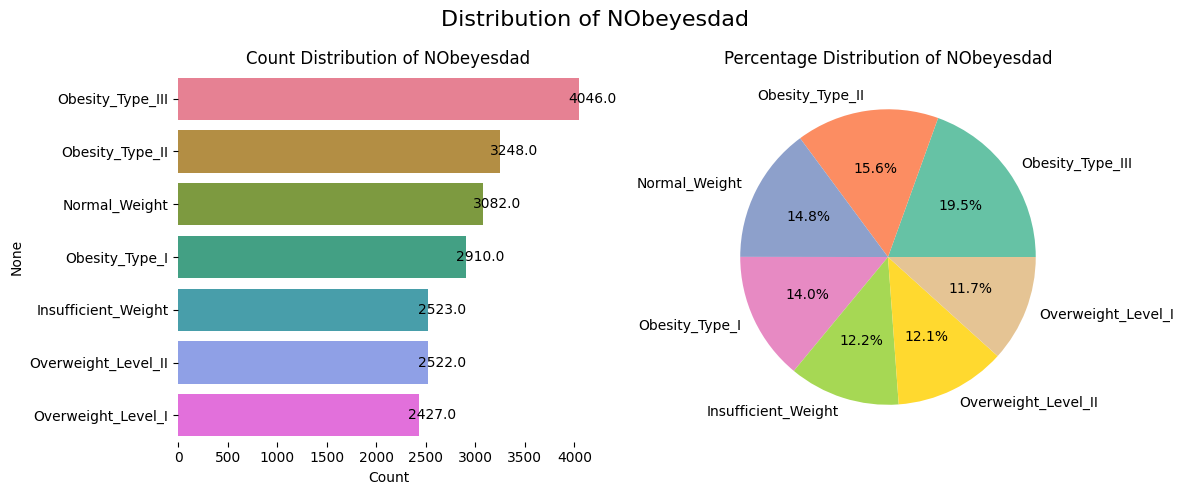

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar chart for NObeyesdad distribution
NObeyesdad_counts = train_data['NObeyesdad'].value_counts()
sns.barplot(x=NObeyesdad_counts, y=NObeyesdad_counts.index, ax=axes[0], palette='husl')
axes[0].set_title('Count Distribution of NObeyesdad')
axes[0].set_xlabel('Count')

# Remove the frame
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)

# Add total count labels on top of the bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center', xytext=(10, 0), textcoords='offset points')

# Pie chart for percentage distribution of NObeyesdad
NObeyesdad_percentage = train_data['NObeyesdad'].value_counts(normalize=True) * 100
axes[1].pie(NObeyesdad_percentage, labels=NObeyesdad_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axes[1].set_title('Percentage Distribution of NObeyesdad')

# Display the plot
plt.suptitle('Distribution of NObeyesdad', fontsize=16)
plt.tight_layout()

**Distribution of NObeyesdad**

These visualizations highlight the multifaceted nature of obesity risk within the surveyed population, providing a visual summary of the target variable's composition.

- Obesity_Type_III, representing the most severe level of obesity, comprises the largest segment (19.5%) of the dataset. This indicates that a considerable portion of the population sampled is at the highest obesity risk.
- Overweight_Level_I and Overweight_Level_II combined account for roughly a quarter of the dataset, demonstrating the significant occurrence of overweight conditions among the participants.
- Categories for Normal_Weight and Obesity_Type_I are nearly equally distributed, each making up about 14-15% of the dataset.

## Categorical Variables:

Through bar and pie charts for categorical variables like `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, and `MTRANS`, distinct patterns emerge.  These visualizations underscore the importance of lifestyle and genetic factors in assessing obesity risk.

In [ ]:
# Identify non-numerical columns (excluding 'NObeyesdad') as categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns.drop(['NObeyesdad'])

# Display the categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [ ]:
def plot_categorical_distribution(data, column):
    # Set up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Bar chart for column distribution
    column_counts = data[column].value_counts()
    sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Count Distribution of {column}')
    axes[0].set_xlabel('Count')

    # Remove the frame
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['left'].set_visible(False)

    # Add total count labels on top of the bar
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                         ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    # Pie chart for percentage distribution
    column_percentage = data[column].value_counts(normalize=True) * 100
    axes[1].pie(column_percentage, labels=column_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    axes[1].set_title(f'Percentage Distribution of {column}')

    # Display the plot
    plt.suptitle(f'Distribution of {column}', fontsize=16)
    plt.tight_layout()
    plt.show()


<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


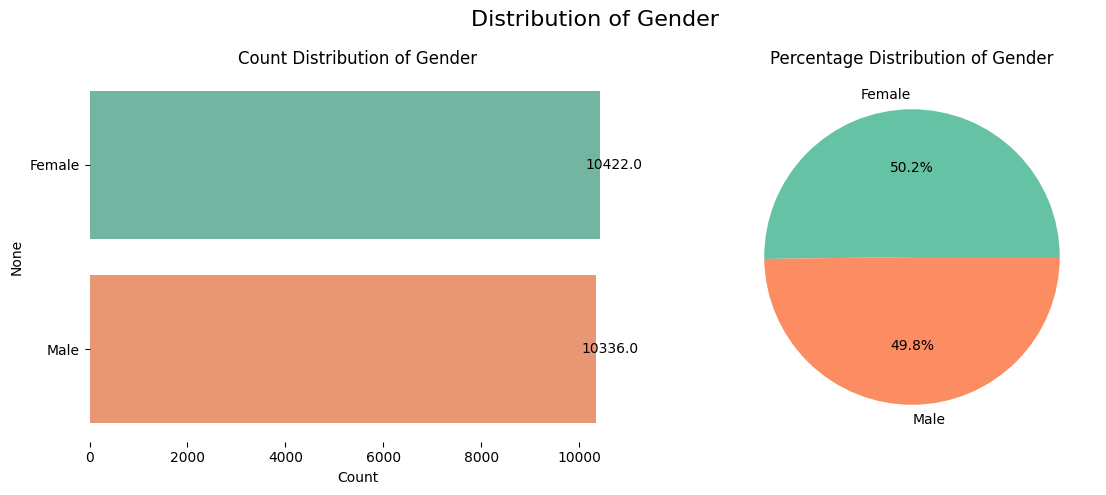

In [ ]:
# for the 'Gender' column
plot_categorical_distribution(train_data, 'Gender')

**Count and Percentage Distribution of Gender**

- The dataset displays a nearly balanced distribution between male and female participants, with females slightly outnumbering males. The bar chart shows 10,422 females and 10,336 males, while the pie chart reflects this balance with females representing 50.2% and males 49.8%.
- Such a balanced gender distribution is beneficial for predictive modeling since it suggests that any model developed will have a roughly equal representation of data from both genders. This balance helps prevent gender bias in the model's predictions.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


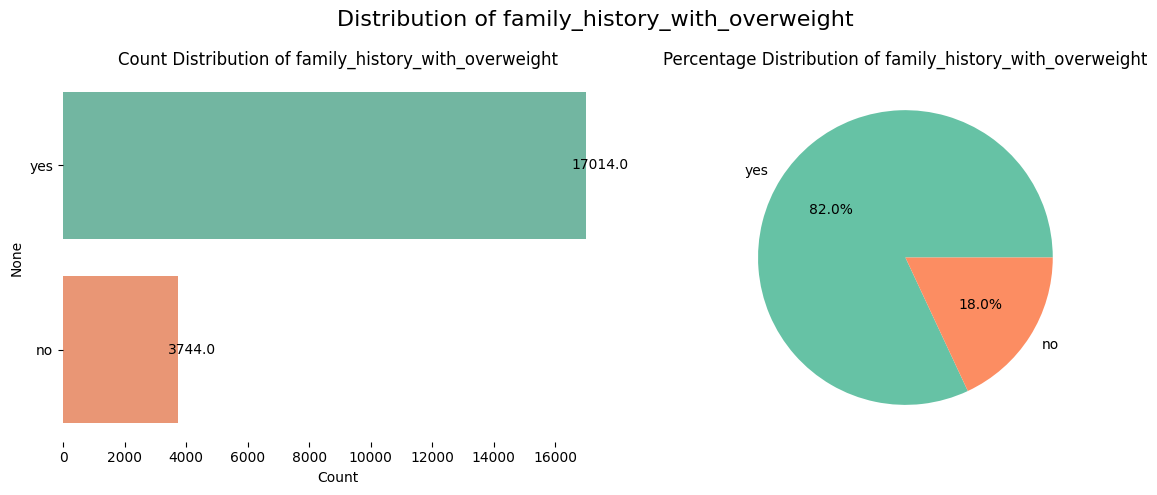

In [ ]:
# for the 'family_history_with_overweight' column
plot_categorical_distribution(train_data, 'family_history_with_overweight')

**Count and Percentage Distribution of Family History with Overweight**


- A significant majority, 82% of the participants, indicate having a family history of being overweight. This is depicted in both the bar and pie charts, with the count being 17,014 for 'yes' and 3,744 for 'no'.
- The prevalence of a family history of overweight among participants could suggest a genetic or environmental predisposition to overweight and obesity within this population. This factor could be a strong predictor in the model, given its high prevalence.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


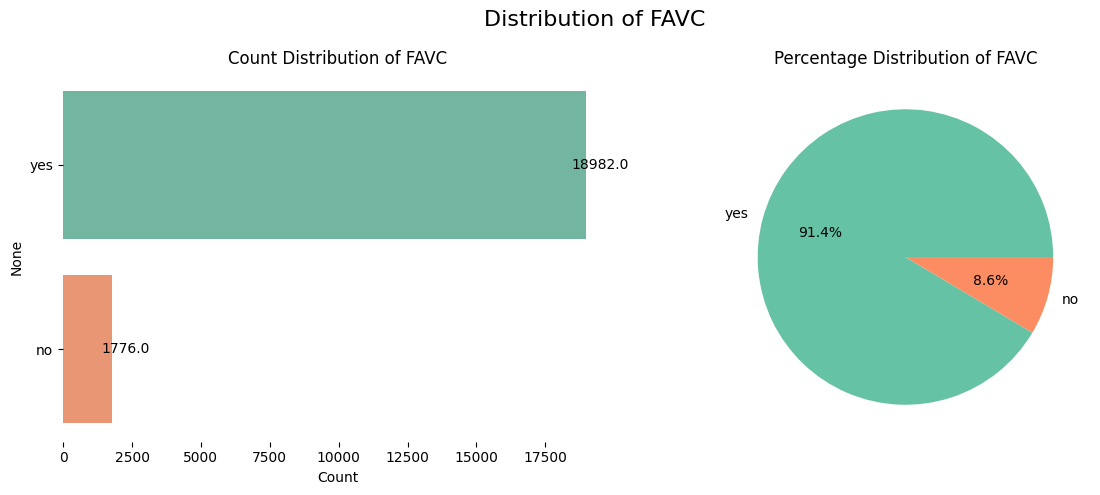

In [ ]:
# for the 'FAVC' column
plot_categorical_distribution(train_data, 'FAVC')

**Count and Percentage Distribution of FAVC**

- The majority of the dataset, 91.4%, indicates 'yes' to frequently consuming high-caloric foods, which corresponds to 18,982 individuals. Only 8.6% (1,776 individuals) report not frequently consuming high-caloric foods.
- Such a dominant 'yes' response suggests that frequent consumption of high-caloric foods is a common behavior among the participants. This variable could be a critical predictor in the obesity risk model due to its high prevalence.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


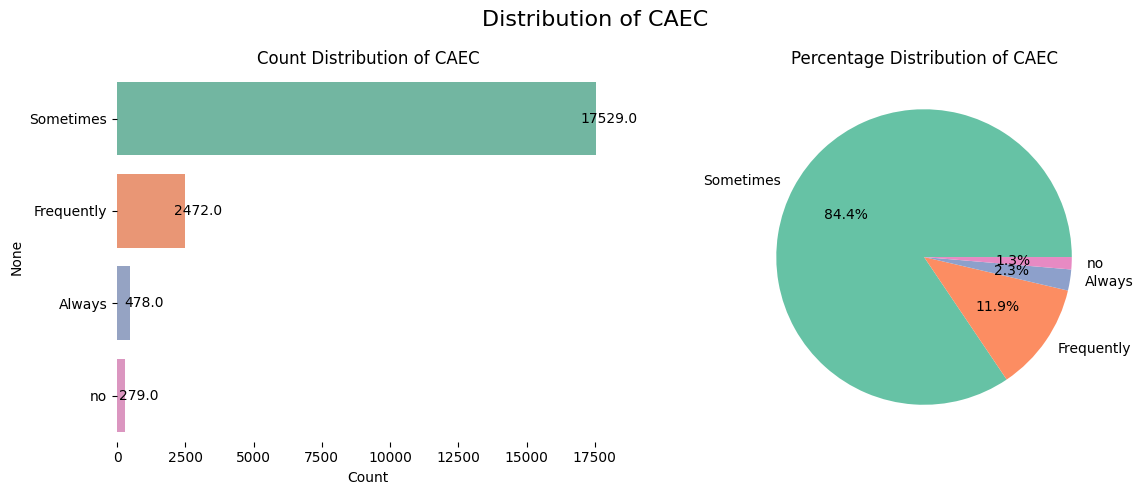

In [ ]:
# for the 'CAEC' column
plot_categorical_distribution(train_data, 'CAEC')

**Count and Percentage Distribution of CAEC**

- The overwhelming majority, 84.4% (17,529 individuals), report snacking sometimes between meals, indicating that occasional snacking is a common eating habit among the participants.
- A much smaller percentage, 11.9% (2,472 individuals), snack frequently, while very few participants report 'Always' (2.3%, 478 individuals) or 'No' (1.3%, 279 individuals) snacking between meals.
- The high prevalence of 'Sometimes' snacking suggests this may not be a highly discriminatory feature for predicting obesity levels, given that it is so common across the dataset.
- The categories of 'Frequently', 'Always', and 'No' could provide more distinctive insights, as they represent less common behaviors. It might be particularly interesting to see how the 'No' and 'Always' categories correlate with obesity levels, as they are on opposite ends of the spectrum.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


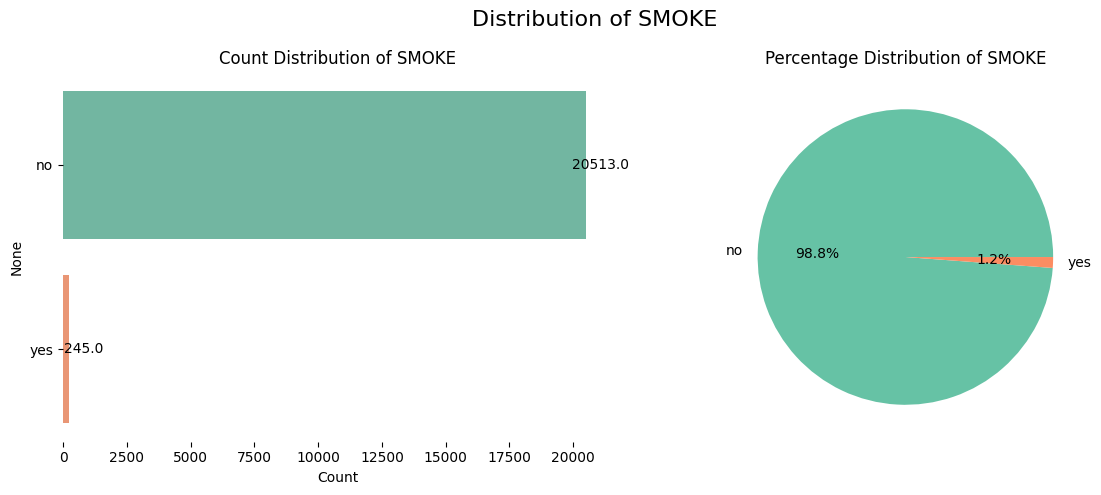

In [ ]:
# for the 'SMOKE' column
plot_categorical_distribution(train_data, 'SMOKE')

**Count and Percentage Distribution of SMOKE**

- A vast majority of the dataset, 98.8% (20,513 individuals), are non-smokers. Only a small fraction, 1.2% (245 individuals), reported being smokers.
- The low prevalence of smoking in the dataset indicates that it may not be a strong standalone predictor of obesity risk due to the low variability in responses.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


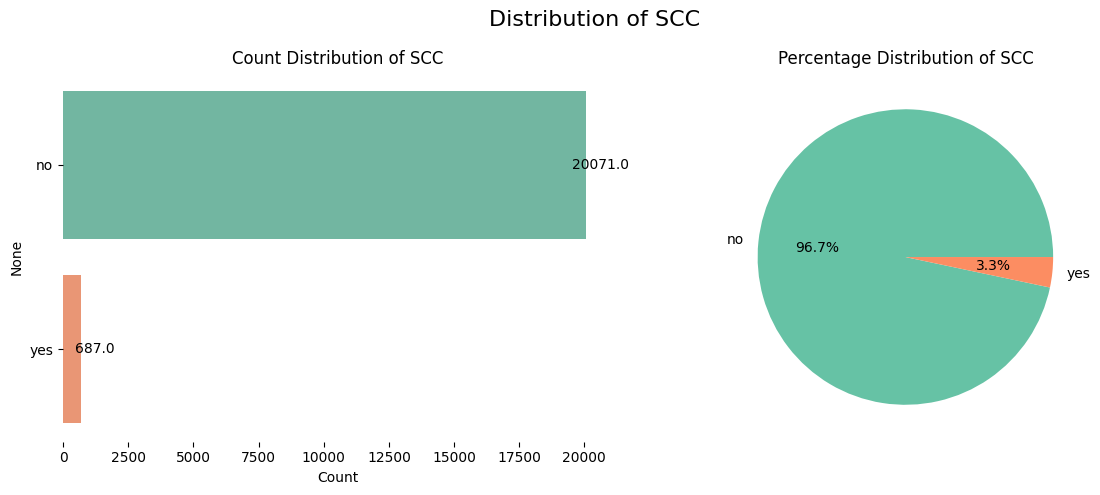

In [ ]:
# for the 'SCC' column
plot_categorical_distribution(train_data, 'SCC')

**Count and Percentage Distribution of SCC**

- The overwhelming majority of participants, 96.7% (20,071 individuals), do not monitor their calorie consumption (`no`), while a small portion, 3.3% (687 individuals), do engage in monitoring their calorie intake (`yes`).
- The skewed distribution towards 'no' suggests that calorie consumption monitoring is not a common behavior in the dataset.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


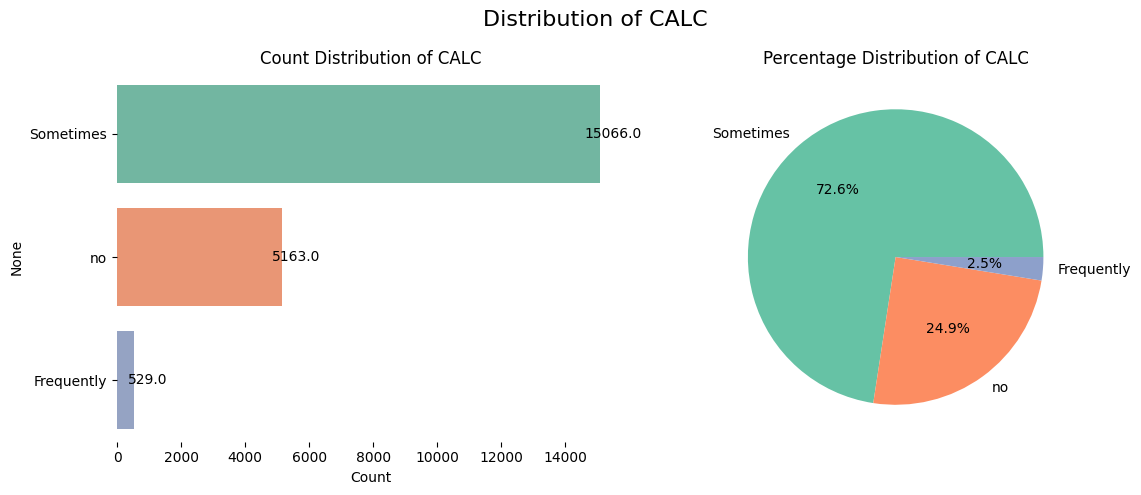

In [ ]:
# for the 'CALC' column
plot_categorical_distribution(train_data, 'CALC')

**Count and Percentage Distribution of CALC**

- The vast majority of participants, 72.6% (15,066 individuals), report consuming alcohol 'Sometimes'. This category far outweighs the 'no' (24.9%, 5,163 individuals) and 'Frequently' (2.5%, 529 individuals) responses.
- Given that a large proportion of the dataset falls into the 'Sometimes' category, this feature may not have strong discriminative power when used alone in predictive modeling for obesity risk.
- The distribution of alcohol consumption habits provides a snapshot of the participants' lifestyle choices, which are an important aspect of overall health and can have various implications for obesity.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


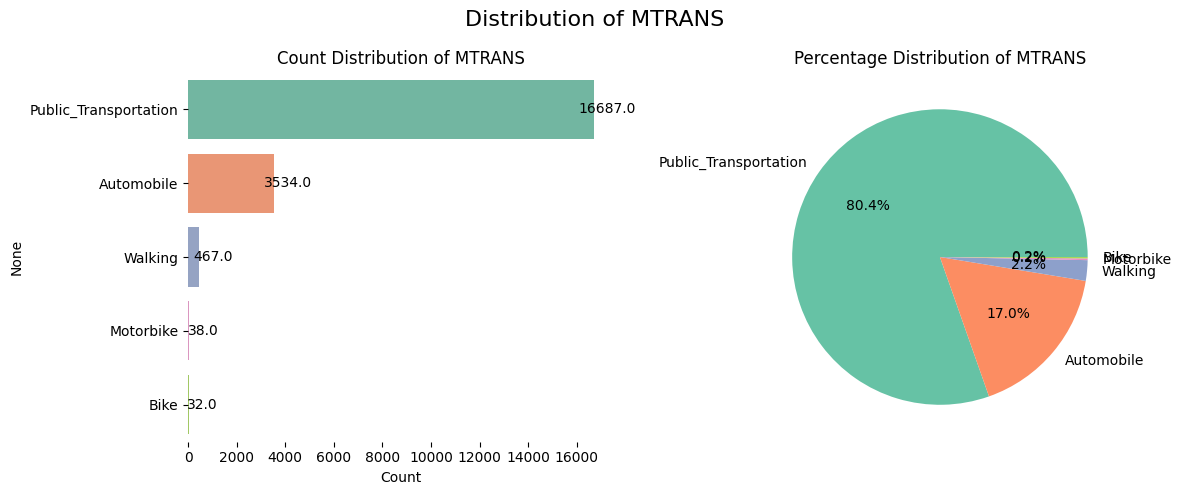

In [ ]:
# for the 'MTRANS' column
plot_categorical_distribution(train_data, 'MTRANS')

**Count and Percentage Distribution of MTRANS**


- A substantial majority of the dataset, 80.4% (16,687 individuals), rely on public transportation, which dwarfs the usage of other transportation modes.
- Personal automobiles are used by 17% (3,534 individuals), while active transportation modes like walking and biking are quite rare, with only 467 and 32 individuals using them, respectively. Motorbike use is also minimal, with only 38 individuals reporting this mode of transportation.

## Numerical Variables:

Histograms and boxplots for numerical variables such as `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, and `TUE` provide insights into the distribution and spread of these variables. Notably, while the variables related to eating habits and physical activity reveal diverse patterns that could influence obesity risk.

In [ ]:
# Numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64'])

# Display the Numerical columns
print("Numerical Columns:", numerical_columns.columns)

Numerical Columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [ ]:
# Create histplots with density to visualize the distribution of data
def visualize_distribution(data, column):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='limegreen')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [ ]:
def plot_boxplots_for_numerical_columns(data, column):
    # Create a box plot for the numerical column
    plt.figure(figsize=(12, 1))
    sns.boxplot(x=data[column], color='salmon')
    plt.title(f'Boxplot of {column}')
    plt.show()


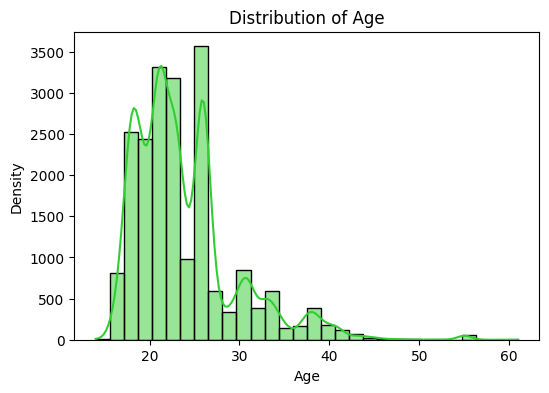

In [ ]:
# for numerical column 'Age'
visualize_distribution(train_data, 'Age')

**Distribution of Age**

- There are multiple peaks visible in the distribution, which could indicate the presence of different age cohorts within the dataset. These subgroups might represent distinct behavioral patterns or life stages that are relevant to obesity risk.
- The distribution has a long tail towards the older ages, indicating fewer participants as age increases. This is typical in many datasets, as younger individuals are often more engaged in survey participation or certain types of data collection efforts.

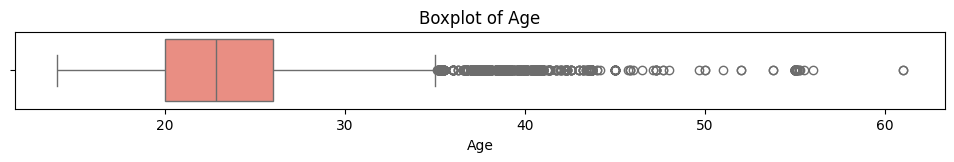

In [ ]:
# for numerical column 'Age'
plot_boxplots_for_numerical_columns(train_data, 'Age')

- The boxplot indicates that the median age is around the late 20s, with the interquartile range (IQR) spanning from the early 20s to the early 30s. This suggests that half of your participants fall within this age range.
- There are several points beyond the whiskers on the right side of the boxplot, which could be potential outliers. These points represent individuals who are older than what is typical for the bulk of the dataset.
- The concentration of the boxplot toward the lower age range confirms that the dataset consists predominantly of a younger adult population.

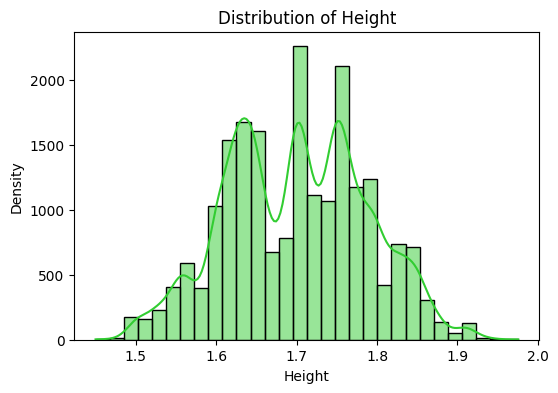

In [ ]:
# for numerical column 'Height'
visualize_distribution(train_data, 'Height')

**Distribution of Height**

- The most common height ranges are clustered around 1.6 to 1.7 meters and around 1.7 to 1.8 meters. These clusters may correspond to average female and male heights, respectively, although without specific gender data linked to each observation, this is an assumption based on common height distributions.
- The variability in height could be a significant factor in predicting obesity risk if height is associated with particular obesity categories.

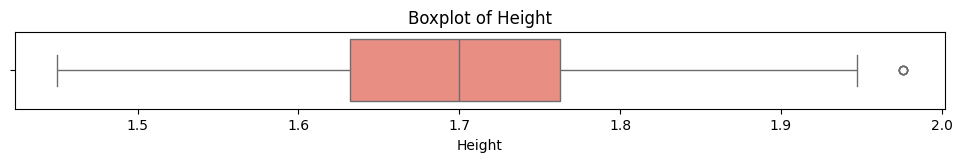

In [ ]:
# for numerical column 'Height'
plot_boxplots_for_numerical_columns(train_data, 'Height')

- The median height appears to be around 1.7 meters, with the interquartile range (IQR) spanning from approximately 1.6 to 1.8 meters. This indicates that the middle 50% of participants have heights within this range.
- There is at least one data point that is marked as a potential outlier on the higher end, indicating a participant significantly taller than the rest. Outliers in height could be due to natural variation or data entry errors.

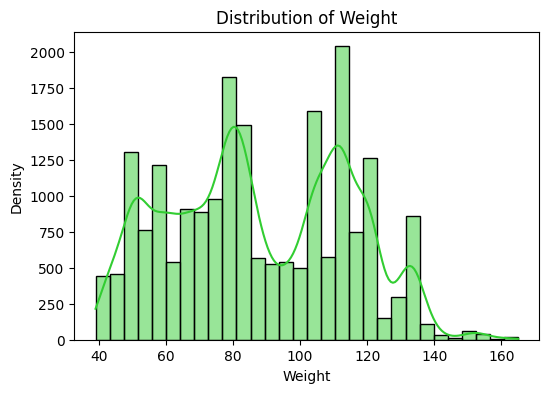

In [ ]:
# for numerical column 'Weight'
visualize_distribution(train_data, 'Weight')

**Distribution of Weight**

- The distribution of weight appears to be multi-modal, with several peaks. This suggests the presence of distinct groups within the dataset, which could be based on various factors such as gender, age, or different obesity levels.
- There are notable peaks around 60 kg, 80 kg, and beyond 100 kg, indicating a wide range of body weights among the participants.

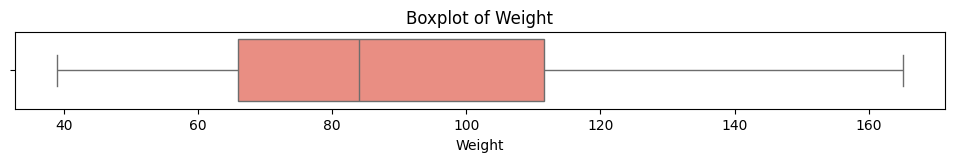

In [ ]:
# for numerical column 'Weight'
plot_boxplots_for_numerical_columns(train_data, 'Weight')

- The median weight appears to be slightly above 80 kg, with the interquartile range (IQR) suggesting that the middle 50% of weights are distributed between approximately 60 kg and a little over 100 kg.
- The boxplot is relatively symmetrical but shows a broader spread than the height distribution. This is expected as weight can vary widely among individuals of similar heights due to differences in body composition.

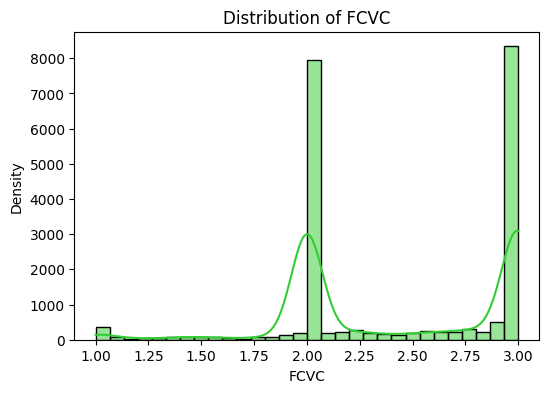

In [ ]:
# for numerical column 'FCVC'
visualize_distribution(train_data, 'FCVC')

**Distribution of FCVC**

- The distribution is notably peaked, particularly around the values 2 and 3, indicating that most participants consume vegetables frequently (value of 3) or sometimes (value of 2).
- The left tail of the distribution (value of 1) has a considerably lower height, suggesting that a smaller portion of the population rarely consumes vegetables.
- The peaks at higher frequencies suggest that vegetable consumption is a common behavior, which could have protective effects against obesity.

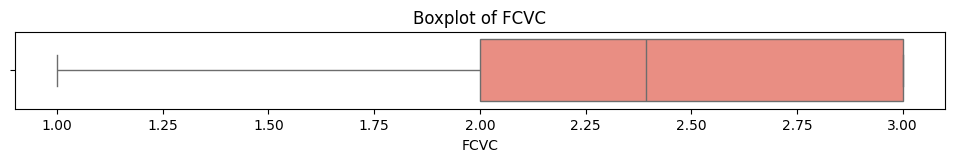

In [ ]:
# for numerical column 'FCVC'
plot_boxplots_for_numerical_columns(train_data, 'FCVC')

- The median is situated around the 2.5 mark, which suggests that on average, participants consume vegetables frequently.
- The interquartile range is quite narrow, centered around 2 to 3, indicating that most participants have a consistently high frequency of vegetable consumption.

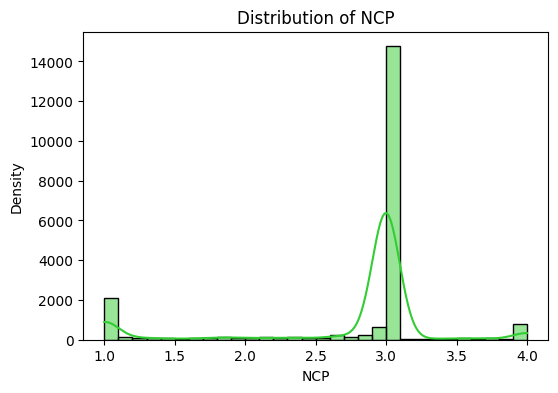

In [ ]:
# for numerical column 'NCP'
visualize_distribution(train_data, 'NCP')

**Distribution of NCP**

- The distribution is sharply peaked at the value 3, which overwhelmingly indicates that most participants typically consume three main meals per day. This aligns with common dietary recommendations and cultural norms about meal frequency.
- The significantly lower bars for 1, 2, and 4 suggest that fewer participants deviate from the standard three-meal pattern. Those consuming only one or two meals or as many as four meals are relatively rare within the dataset.

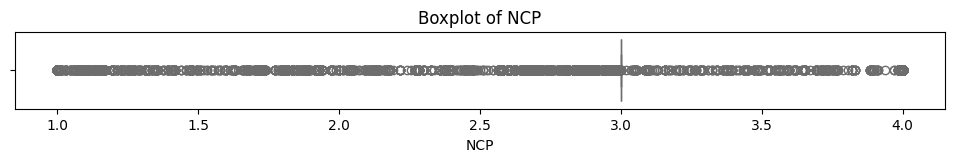

In [ ]:
# for numerical column 'NCP'
plot_boxplots_for_numerical_columns(train_data, 'NCP')

- The data is tightly clustered around the value 3, which aligns with the standard for three main meals per day, indicating this is the most common meal frequency.
- The interquartile range is extremely narrow, and there are numerous data points across the entire range of possible values, but the concentration around 3 is clear.
- The boxplot reveals several outliers, particularly for lower values (less than 3 meals a day). These outliers suggest that a smaller proportion of the population reports eating fewer than three meals per day.

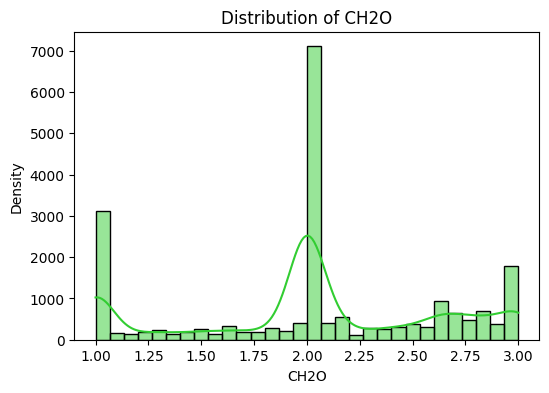

In [ ]:
# for numerical column 'CH2O'
visualize_distribution(train_data, 'CH2O')

**Distribution of CH2O**

- The distribution has a prominent peak at around 2 liters of water per day, which is often recommended as an adequate daily water intake for adults. This suggests that many participants adhere to this guideline.
- There is variability in the dataset, with smaller peaks at the lower and higher ends of the water consumption range, indicating that some participants drink significantly less or more than the typical 2 liters.

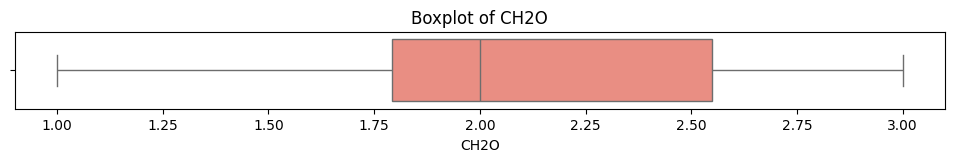

In [ ]:
# for numerical column 'CH2O'
plot_boxplots_for_numerical_columns(train_data, 'CH2O')

-	The median daily water intake is close to 2 liters, and the interquartile range (IQR) is not very wide, indicating that most participants have a fairly consistent daily water consumption.
-	The distribution of daily water intake spans from slightly above 1 liter to just under 3 liters, which encompasses the typical range of water intake recommended for adults.

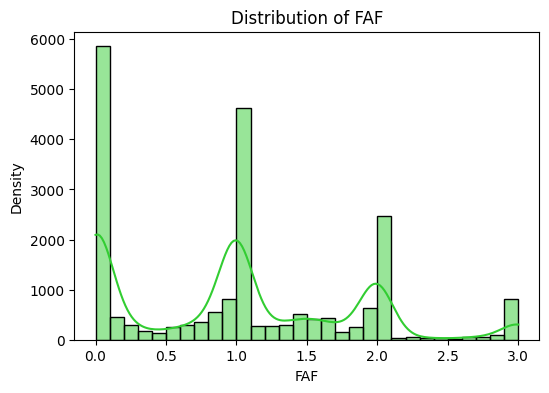

In [ ]:
# for numerical column 'FAF'
visualize_distribution(train_data, 'FAF')

**Distribution of FAF**

-	The distribution shows a significant peak at 0, indicating that a large number of participants do not engage in physical activity frequently.
-	There are other notable peaks around 1 and 2, showing that some participants engage in physical activity once or twice a week. The peak at 3 is smaller, indicating fewer participants engage in physical activity three times a week.

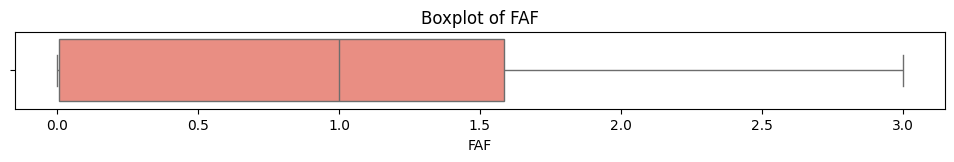

In [ ]:
# for numerical column 'FAF'
plot_boxplots_for_numerical_columns(train_data, 'FAF')

-	The median frequency of physical activity is between 0 and 1, indicating that the typical participant engages in physical activity less than once a week or just once a week.
-	The interquartile range extends from 0 to a little over 1, suggesting that most participants have low to moderate weekly physical activity levels.

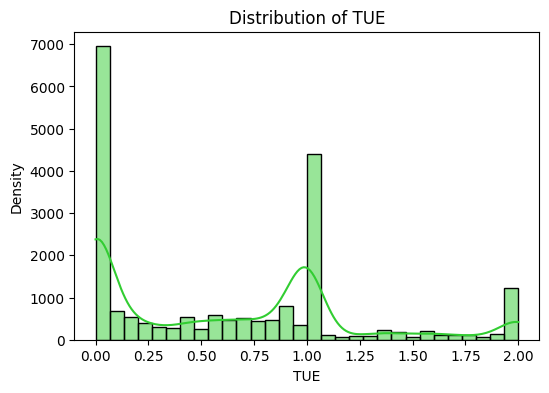

In [ ]:
# for numerical column 'TUE'
visualize_distribution(train_data, 'TUE')

**Distribution of TUE**

-	There's a significant peak at 0, which implies that a large number of participants spend very little or no time using technology devices daily.
-	There is a secondary peak around 1, suggesting another group of participants uses technology devices for about an hour daily.
-	The histogram shows fewer participants reporting higher usage times, with the numbers tapering off after the 1-hour mark and another smaller peak around 2 hours.

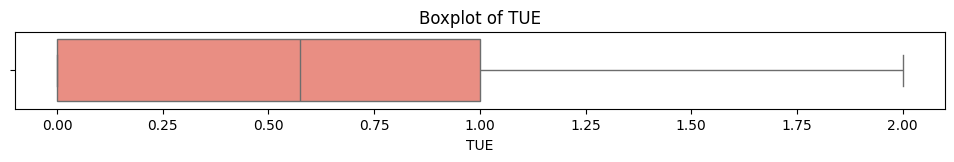

In [ ]:
# for numerical column 'TUE'
plot_boxplots_for_numerical_columns(train_data, 'TUE')

-	The median technology use is around 0.5 to 0.75 units, possibly hours per day, indicating moderate engagement with technology devices among the participants.
-	The interquartile range (IQR) spans from nearly 0 to just over 1, suggesting that most participants have a relatively low to moderate daily usage of technology.

### Analyzing Features with Target Variable

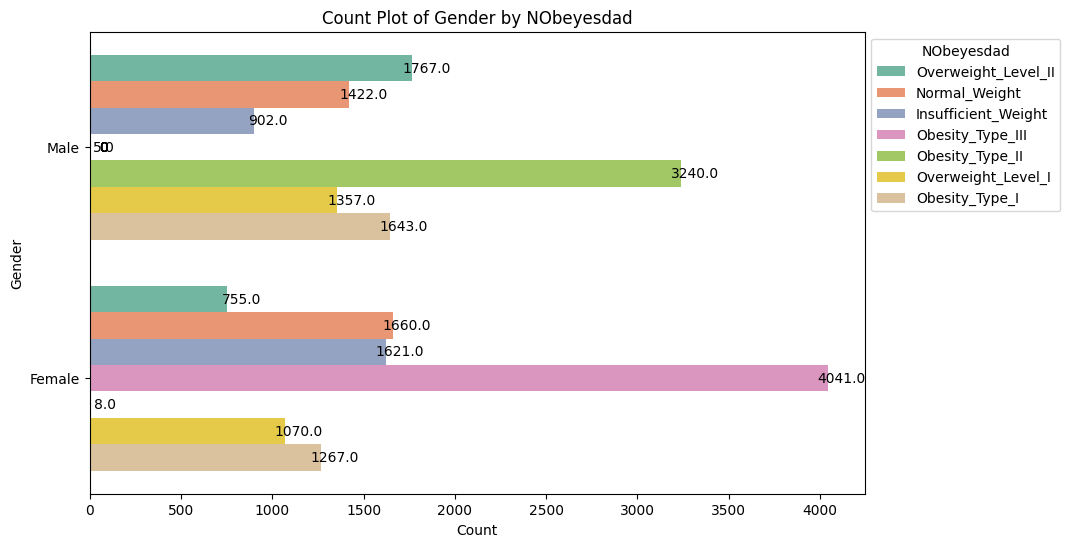

In [ ]:
# Create a count plot of 'Gender' by 'NObeyesdad'
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Gender', hue='NObeyesdad', data=train_data, palette='Set2')

# Add total counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Count Plot of Gender by NObeyesdad')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='NObeyesdad', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Count Plot of Gender by NObeyesdad**

- It appears that females are more represented in the Obesity_Type_III category, with a count reaching beyond 4000.
- Males are most represented in the Obesity_Type_II category, followed by Overweight_Level_II.
- Both genders have high counts in the obesity categories (Obesity_Type_I, Obesity_Type_II, Obesity_Type_III), which suggests that obesity is a significant concern across the dataset.

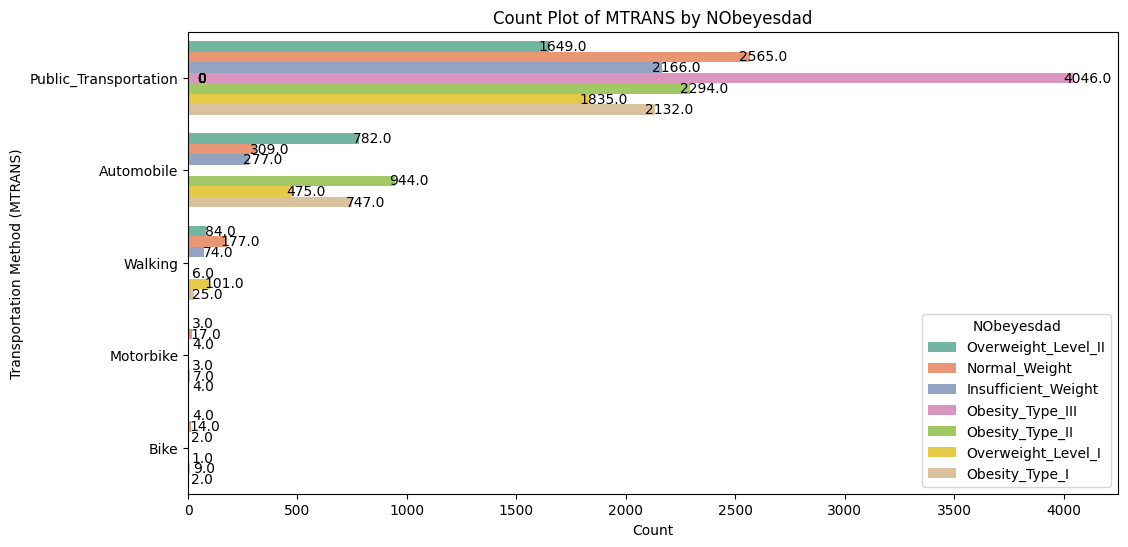

In [ ]:
# Create a bar plot of 'MTRANS' by 'NObeyesdad'
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='MTRANS', hue='NObeyesdad', data=train_data, palette='Set2')

# Add total counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Count Plot of MTRANS by NObeyesdad')
plt.xlabel('Count')
plt.ylabel('Transportation Method (MTRANS)')
plt.legend(title='NObeyesdad', loc='lower right')
plt.show()



**Count Plot of MTRANS by NObeyesdad**

- A large number of individuals using public transportation are categorized in the Obesity_Type_II group, followed by Obesity_Type_III and Normal_Weight.

- Those who travel by automobile also show significant counts in the Obesity_Type_II and Overweight_Level_II categories.

- While the counts are much lower for walking and biking, the distribution suggests that those who walk tend to fall into the Normal_Weight category, whereas biking shows a mixed distribution across different obesity levels.

- Motorbike users are relatively few but seem to be spread across different obesity levels.

- This could be reflective of lifestyle differences associated with each mode of transportation, as active modes like walking and biking are typically linked to lower obesity levels.

<Figure size 1500x1000 with 0 Axes>

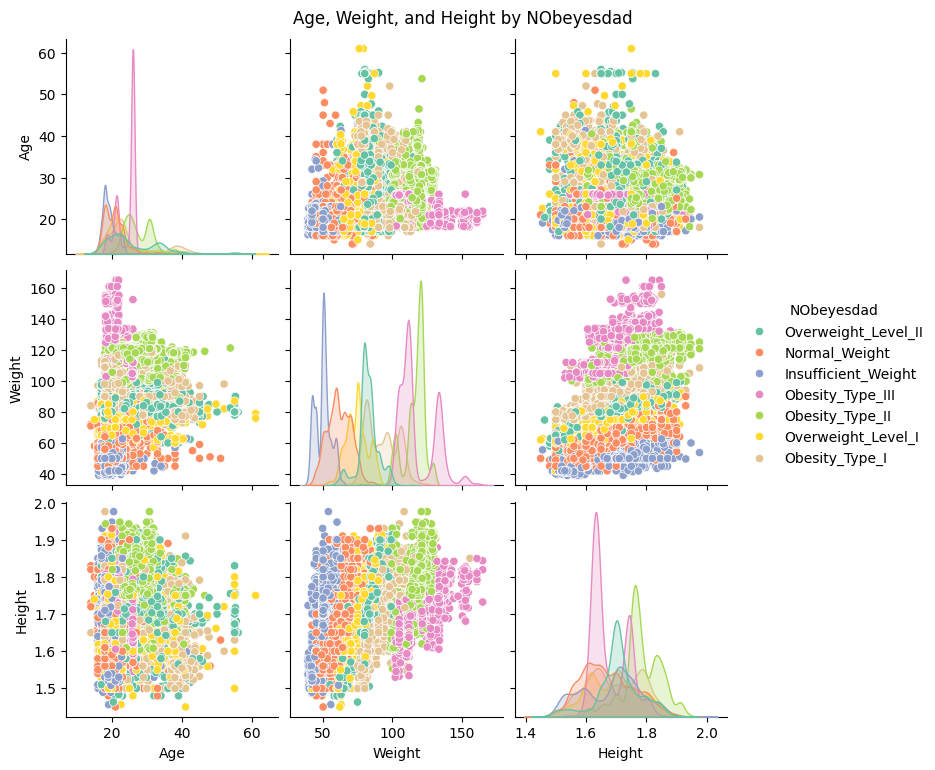

In [ ]:
# Columns to analyze for scatter plot
columns_to_analyze = ['Age', 'Weight', 'Height']

plt.figure(figsize=(15, 10))
scatter_plot = sns.pairplot(train_data, vars=columns_to_analyze, hue='NObeyesdad', palette='Set2')
scatter_plot.fig.suptitle('Age, Weight, and Height by NObeyesdad', y=1.02)
plt.show()


**Age, Weight, and Height by NObeyesdad**

- There seems to be a wide distribution of weights across all ages, with a dense concentration of obesity classifications in the middle-age range. Older ages have a wider spread of obesity levels, although the number of observations is lower.

- Height does not show a strong trend with age, suggesting that once adult height is reached, it remains relatively consistent, as expected. However, within each height bracket, there are various obesity classifications.

- The scatterplot between weight and height illustrates a positive relationship, with taller individuals also having higher weights. This is a typical pattern, but the spread of obesity classifications across the plot indicates the complexity of the relationship between these two measurements and obesity.

- The density plots on the diagonal show the distribution of each variable across the different obesity classifications. For weight and height, there are clear separations between the categories, while age overlaps more between the groups.

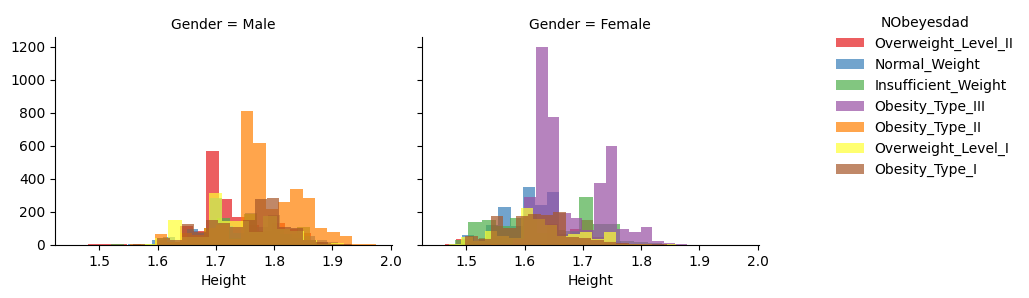

In [ ]:
# Create a grid of subplots based on 'Gender', add 'NObeyesdad'
graph = sns.FacetGrid(train_data, col='Gender', hue='NObeyesdad', palette='Set1')
# Map histograms of 'Height'
graph.map(plt.hist, 'Height', alpha=0.7, bins=20)
graph.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Histograms of Height by NObeyesdad and Gender**

- The histogram for males shows a spread of heights with several peaks, indicating multiple common heights within the male population. The spread of obesity categories within these heights is varied, with a noticeable concentration in certain height ranges.

- The female histogram also shows a spread of heights but with a distinct peak. Similar to the males, there's a spread of obesity classifications across different heights. The peak suggests a more common average height for females than for males.
Obesity Distribution Within Height

For both genders, certain heights seem to correlate with specific obesity categories. For instance, in males, the tallest heights correspond with a high occurrence of Obesity_Type_II, while in females, Obesity_Type_III.


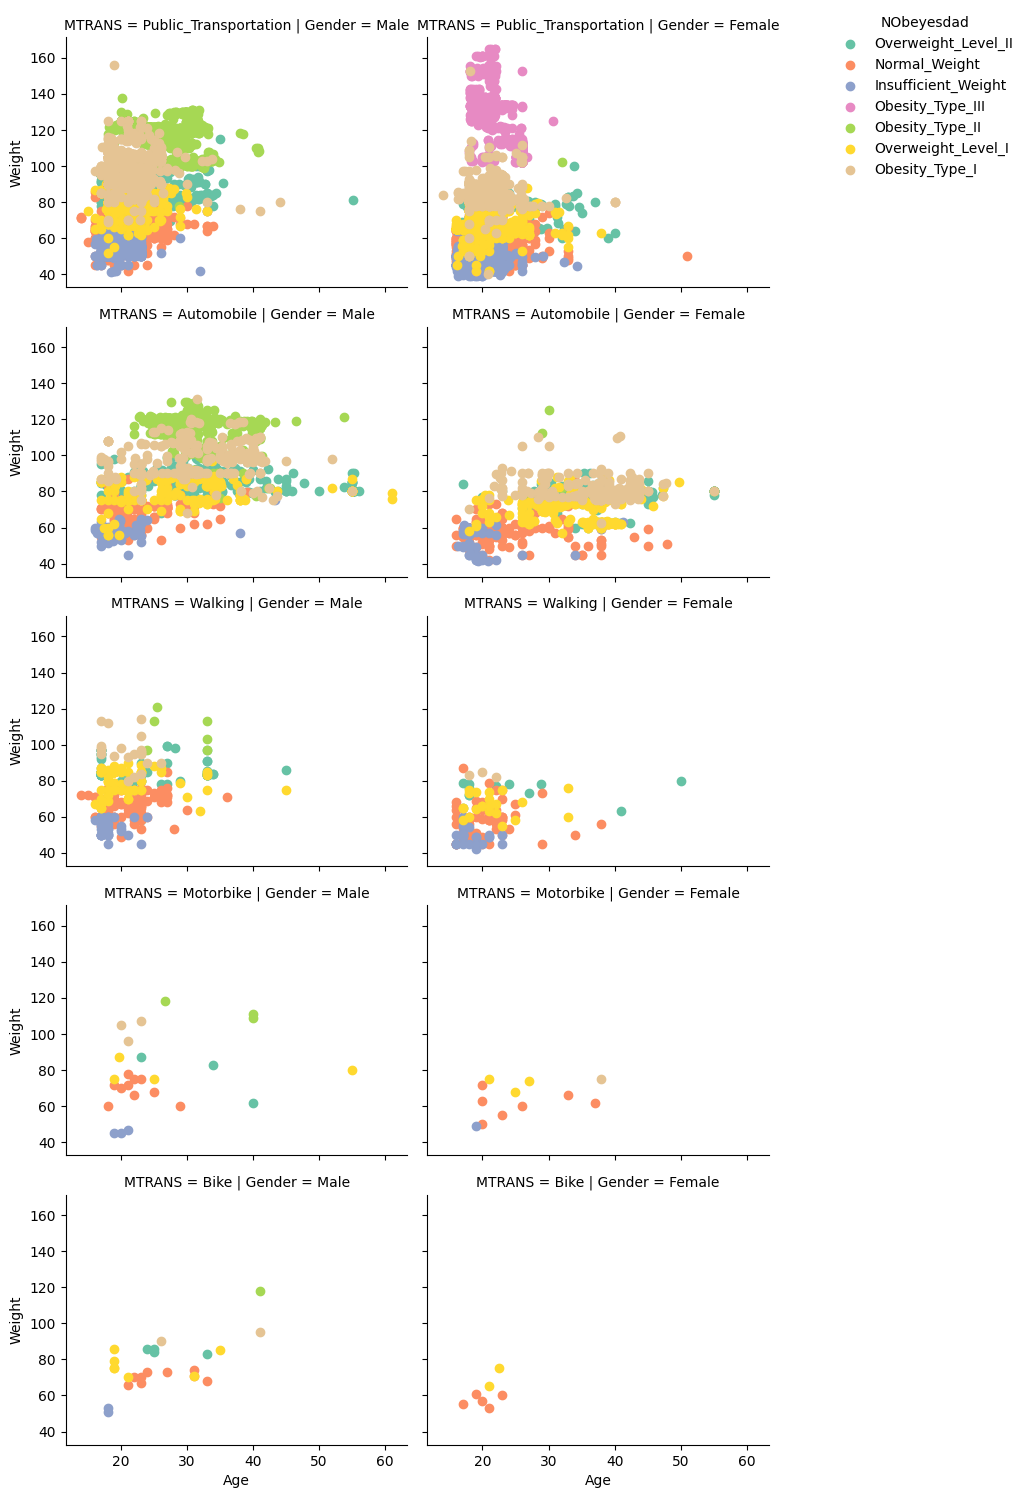

In [ ]:
# Create a grid of subplots based on 'Gender' and 'MTRANS'
graph = sns.FacetGrid(train_data, col='Gender', row='MTRANS', hue='NObeyesdad', palette='Set2')
# Map scatter plots of 'Age' and 'Weight'
graph.map(plt.scatter, 'Age', 'Weight')
graph.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Scatter Plots of Age and Weight by Gender and MTRANS**

- For both genders using public transportation, there's a broad distribution of weight across ages, with notable concentrations in the obesity categories.

- Male and female automobile users show a dense clustering in the overweight and obesity categories, suggesting a potential link between less active transportation and higher weight.

- Both male and female participants who walk as their primary mode of transportation display a more spread out distribution, with a presence in the normal and overweight categories.

- Motorbike users, though fewer in number, display varied weight distribution. For males, there's a wide spread across obesity categories; females show less diversity in obesity levels.

- Cyclists, particularly males, tend to cluster in the lower weight categories, potentially indicating a more active lifestyle. Female cyclists are few but show a similar pattern.


### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap - Training Data')

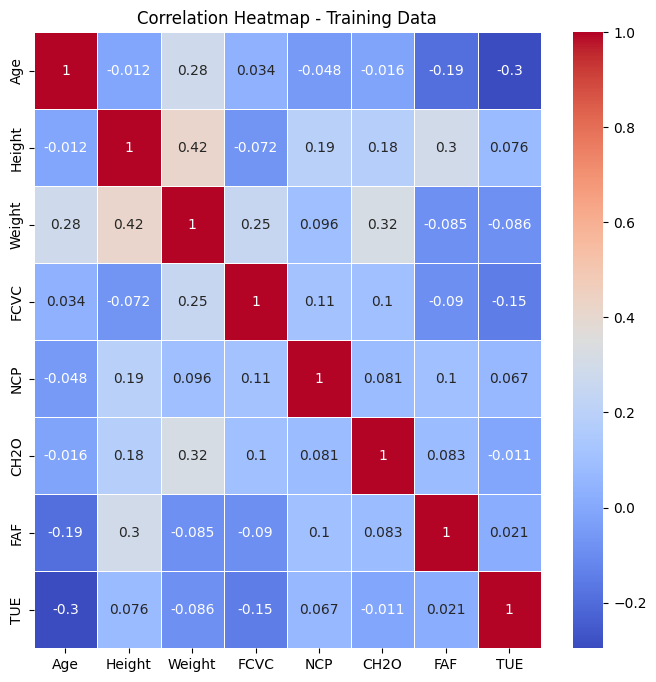

In [ ]:
# Create a correlation heatmaps
plt.figure(figsize=(18, 8))

# Subset the selected columns for training data
subset_data_train = train_data.select_dtypes(include=['float64', 'int64'])
plt.subplot(1, 2, 1)
sns.heatmap(subset_data_train.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap - Training Data')


**Insights from the Correlation Heatmap**
- **Age and TUE:**
Age shows a negative correlation with TUE (Time Using Technology Devices), which suggests that younger participants may be spending more time with technology compared to older ones.
- **Weight and Height:**
There's a positive correlation between Weight and Height, which is expected as taller individuals often weigh more due to larger body frames.
- **Weight and CH2O:**
Weight also has a moderate positive correlation with CH2O (Consumption of Water Daily), indicating that individuals who weigh more may also tend to drink more water.
- **FAF and Age:**
There is a negative correlation between FAF (Physical Activity Frequency) and Age, suggesting physical activity tends to decrease as age increases.
- **FAF and TUE:**
FAF has a very low positive correlation with TUE, implying there isn’t a strong relationship between how often people exercise and the amount of time they spend using technology.
- **NCP and Height:**
NCP (Number of Main Meals) has a small positive correlation with Height, possibly reflecting the increased nutritional requirements of taller individuals.

In [ ]:
subset_data_train.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


**Correlation Heatmap**

The heatmap highlights that certain expected relationships hold, like weight increasing with height. The negative correlations between age and both `TUE` and `FAF` may point to generational differences in technology use and physical activity levels. The lack of strong correlations between most lifestyle variables suggests a complex interplay between these factors and obesity, without any single factor dominating. For predictive modeling, it’s critical to consider these correlations to avoid multicollinearity and understand how each variable may contribute to predicting outcomes related to obesity.

# Data Pre-processing

## Handling Outliers

**Capping Method for 'Age'**

To address outliers in the 'Age' column, the capping method has been applied, setting acceptable limits for age values.

The defined capping limits are as follows:

- Minimum acceptable age (age_min): 14 years
- Maximum acceptable age (age_max): 35 years
The capping method involves replacing age values exceeding the defined limits with the respective limit.


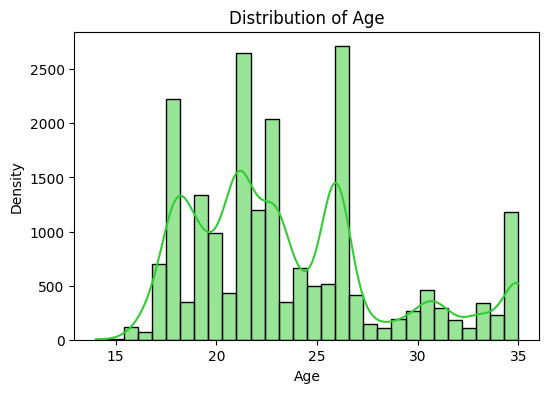

In [ ]:
# Define capping limits
age_min = 14  # Minimum acceptable age
age_max = 35  # Maximum acceptable age

# Apply capping to the 'Age' column
train_data['Age'] = train_data['Age'].apply(lambda age: age_max if age > age_max else (age_min if age < age_min else age))

# Visualize the distribution after capping
visualize_distribution(train_data, 'Age')


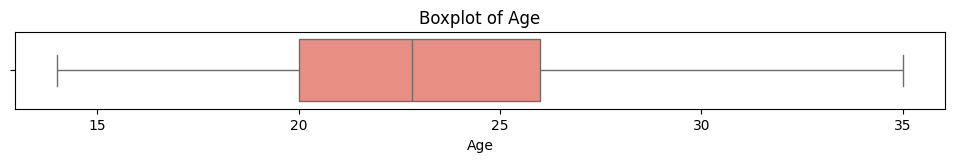

In [ ]:
# for numerical column 'Age'
plot_boxplots_for_numerical_columns(train_data, 'Age')

**Impact of Capping
After applying capping:**

The histogram and boxplot after capping the Age data between 14 and 35 should show a cleaner, more uniform distribution. The histogram will now only display ages within this range, and the boxplot should reflect no outliers beyond these limits.

**Binning for 'NCP' (Number of Main Meals)**

Binning is applied to the 'NCP' column, involving the grouping of continuous values into discrete bins or categories. This transformation helps manage extreme values and converts the numerical variable into a categorical one.

For the 'NCP' column:

- Bin Edges: [0, 2, 3, 4]
- Bin Labels: ['Low', 'Medium', 'High']


In [ ]:
# Define bin edges and labels
bin_edges = [0, 2, 3, 4]
bin_labels = ['Low', 'Medium', 'High']  # Labels for each bin

# Create a new categorical column based on binning
train_data['NCP'] = pd.cut(train_data['NCP'], bins=bin_edges, labels=bin_labels, include_lowest=True)
test_data['NCP'] = pd.cut(test_data['NCP'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the updated dataset with the new categorical column
display(train_data[['NCP']].head())


,NCP
0,Medium
1,Medium
2,Low
3,Medium
4,Low


- The NCP column in both datasets now reflects these categorical bins rather than the original numerical values.
- Each record's NCP value is now either Low, Medium, or High depending on how many main meals they have.

<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


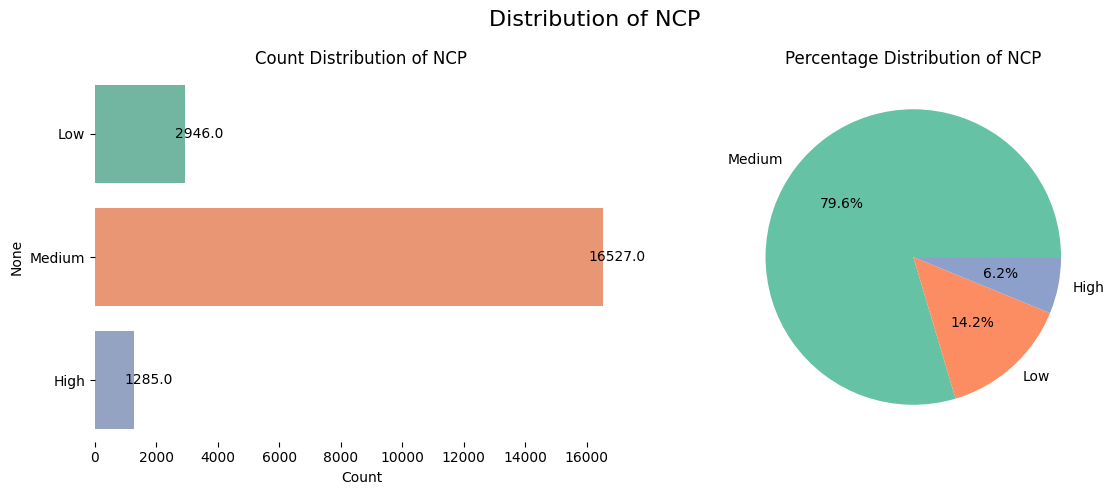

In [ ]:
# for the 'NCP' column
plot_categorical_distribution(train_data, 'NCP')

**Insights from the Distributions**

- A large majority of the dataset falls within the 'Medium' category, indicating that most individuals report having 2 to 3 main meals per day.

- The 'Low' category, which signifies 0 to 2 main meals per day, and the 'High' category, indicating more than 3 meals per day, have significantly smaller counts. This could suggest a general pattern or norm of meal frequency among the population.

- The prevalence of 'Medium' could be reflective of recommended dietary guidelines or cultural norms. On the other hand, the 'Low' and 'High' categories could represent deviations from the norm, potentially linked with specific dietary behaviors or health outcomes.


## Feature Engineering

**Body Mass Index (BMI) Calculation**

The Body Mass Index (BMI) is a widely used metric for assessing an individual's body weight relative to their height.

**The BMI is calculated using the formula**: `BMI = Weight / (Height^2)`. To incorporate this meaningful indicator into the dataset, a new column 'BMI' has been created for both the training and testing datasets.


In [ ]:
# Calculate BMI and Create 'BMI' column
train_data['BMI'] = train_data['Weight'] / train_data['Height']**2
test_data['BMI'] = test_data['Weight'] / test_data['Height']**2

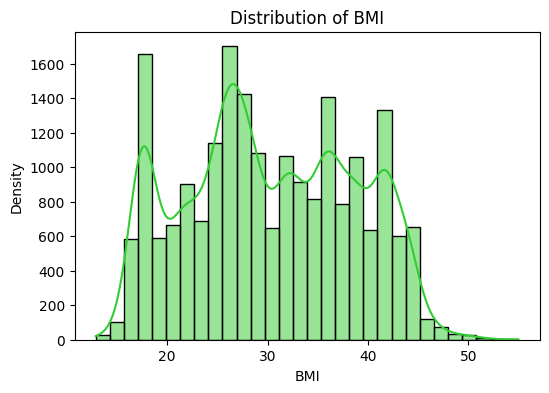

In [ ]:
# for the'BMI' column
visualize_distribution(train_data, 'BMI')

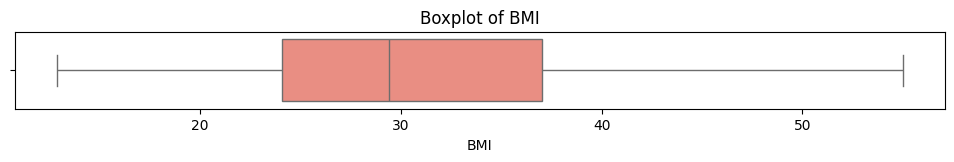

In [ ]:
# for numerical column 'BMI'
plot_boxplots_for_numerical_columns(train_data, 'BMI')

**Insights from the Distributions**

- Multiple peaks may suggest distinct subgroups within population characterized by different BMI levels.
- The distribution may be skewed to the right, indicating that there are more individuals with a higher BMI.


**Mobility Transformation (MTRANS) Categorization**

The 'MTRANS' column, indicating the mode of transportation, is transformed through categorization into a binary feature: 'Active' or 'Non-Active'. The classification is based on whether the transportation mode involves physical activity. Specifically, 'Walking' and 'Bike' are categorized as 'Active', while other modes are labeled as 'Non-Active'.


In [ ]:
# Define the categorization function
def categorize_mtrans(activity):
    if activity in ['Walking', 'Bike']:
        return 'Active'
    else:
        return 'Non-Active'

# Apply the categorization function to 'MTRANS' column
train_data['MTRANS'] = train_data['MTRANS'].apply(lambda x: categorize_mtrans(x))
test_data['MTRANS'] = test_data['MTRANS'].apply(lambda x: categorize_mtrans(x))


<ipython-input-18-36772c4dce98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_counts, y=column_counts.index, ax=axes[0], palette='Set2')


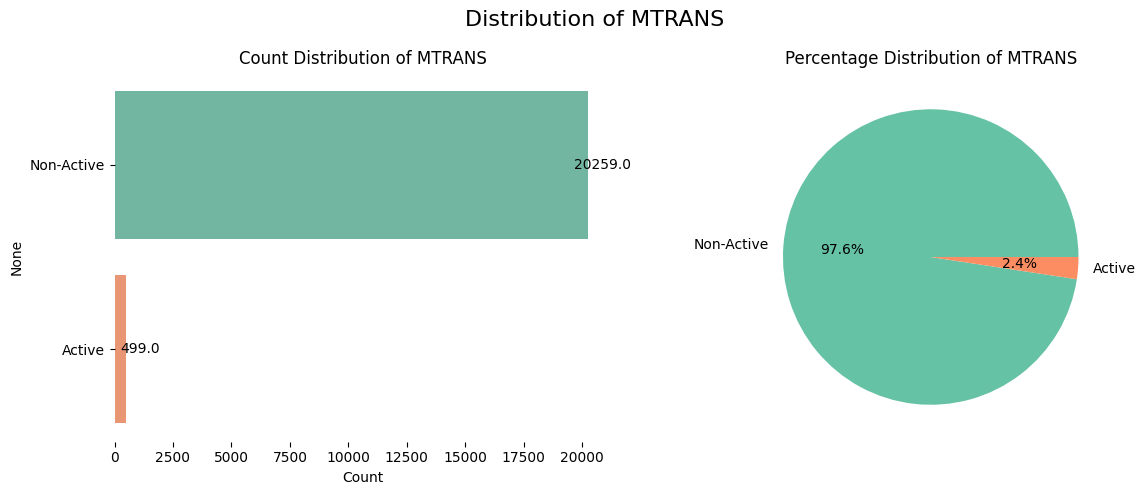

In [ ]:
# for the 'MTRANS' column
plot_categorical_distribution(train_data, 'MTRANS')

**Insights from the Visualizations**

- A significant majority of the dataset falls within the Non-Active category. This dominance suggests that most individuals in dataset use modes of transportation that do not involve physical activity, such as cars or public transportation.
Minor Proportion of Active

- The small percentage of Active transportation users may reflect cultural, geographic, or infrastructural factors that influence transportation choices. It may also suggest areas for public health intervention to encourage more active modes of transportation.

## Feature Encoding

#### Handling categorical data

**Gender**

- Encoded as binary values where Male is represented as 1 and Female as 0.

In [ ]:
# Display unique values
pd.concat([train_data, test_data])['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Apply the encoding to the 'Gender' column for both train_data and test_data
train_data['Gender'] = train_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
test_data['Gender'] = test_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Display unique values after encoding
unique_values_after_encoding = pd.concat([train_data, test_data])['Gender'].unique()
print("Unique values after encoding 'Gender':", unique_values_after_encoding)


Unique values after encoding 'Gender': [1 0]


**Family weight history, FAVC, SMOKE and SCC**
- These binary columns ('family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC') were encoded as binary values where 'yes' is represented as 1 and 'no' as 0.

In [ ]:
# Binary columns
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Display unique values
for column in binary_columns:
    print(f'Unique values in column {column} = {pd.concat([train_data, test_data])[column].unique()}')

Unique values in column family_history_with_overweight = ['yes' 'no']
Unique values in column FAVC = ['yes' 'no']
Unique values in column SMOKE = ['no' 'yes']
Unique values in column SCC = ['no' 'yes']


In [ ]:
# Define encoding lambda function
encode_binary = lambda x: 1 if x == 'yes' else 0

# Apply encoding to each binary column for both train_data and test_data
for column in binary_columns:
    train_data[column] = train_data[column].apply(encode_binary)
    test_data[column] = test_data[column].apply(encode_binary)

# Display unique values after encoding
for column in binary_columns:
    unique_values_after_encoding = pd.concat([train_data, test_data])[column].unique()
    print(f"Unique values after encoding '{column}': {unique_values_after_encoding}")


Unique values after encoding 'family_history_with_overweight': [1 0]
Unique values after encoding 'FAVC': [1 0]
Unique values after encoding 'SMOKE': [0 1]
Unique values after encoding 'SCC': [0 1]


**CAEC and CALC**
- These ordinal columns ('CAEC', 'CALC') were encoded based on their ordinal nature. Categories 'no', 'Sometimes', 'Frequently', and 'Always' were encoded as 0, 1, 2, and 3 respectively.

In [ ]:
# Ordinal columns
ordinal_columns = ['CAEC', 'CALC']

# Display unique values
for column in ordinal_columns:
    print(f'Unique values in column {column} = {pd.concat([train_data, test_data])[column].unique()}')

Unique values in column CAEC = ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in column CALC = ['Sometimes' 'no' 'Frequently' 'Always']


In [ ]:
# Define encoding lambda function for ordinal columns
encode_ordinal = lambda x: {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}.get(x, x)

# Apply encoding to each ordinal column for both train_data and test_data
for column in ordinal_columns:
    train_data[column] = train_data[column].apply(encode_ordinal)
    test_data[column] = test_data[column].apply(encode_ordinal)

# Display unique values after encoding
for column in ordinal_columns:
    unique_values_after_encoding = pd.concat([train_data, test_data])[column].unique()
    print(f"Unique values after encoding '{column}': {unique_values_after_encoding}")


Unique values after encoding 'CAEC': [1 2 0 3]
Unique values after encoding 'CALC': [1 0 2 3]


**MTRANS**
- Encoded as binary values where 'Active' is represented as 1 and 'Non-Active' as 0.

In [ ]:
# Display unique values
pd.concat([train_data, test_data])['MTRANS'].unique()

array(['Non-Active', 'Active'], dtype=object)

In [ ]:
# Apply the encoding to the 'MTRANS' column for both train_data and test_data
train_data['MTRANS'] = train_data['MTRANS'].apply(lambda x: 1 if x == 'Active' else 0)
test_data['MTRANS'] = test_data['MTRANS'].apply(lambda x: 1 if x == 'Active' else 0)

# Display unique values after encoding
unique_values_after_encoding = pd.concat([train_data, test_data])['MTRANS'].unique()
print("Unique values after encoding 'MTRANS':", unique_values_after_encoding)

Unique values after encoding 'MTRANS': [0 1]


**NCP**
- Initially represented as categorical values ('Low', 'Medium', 'High').
Encoded using LabelEncoder, where 'Low' is encoded as 0, 'Medium' as 1, and 'High' as 2.

In [ ]:
# Display unique values
pd.concat([train_data, test_data])['NCP'].unique()

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'NCP' column
train_data['NCP'] = label_encoder.fit_transform(train_data['NCP'])
test_data['NCP'] = label_encoder.transform(test_data['NCP'])

# Display unique values after encoding
unique_values_after_encoding = pd.concat([train_data, test_data])['NCP'].unique()
print("Unique values after encoding 'NCP':", unique_values_after_encoding)

Unique values after encoding 'NCP': [2 1 0]


In [ ]:
# Display summary information about the train_data after encoding
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  int64  
 8   CAEC                            20758 non-null  int64  
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

**Summary Information**

The encoded features have been successfully integrated into the dataset, and the target variable 'NObeyesdad' remains unchanged.
The dataset now contains 18 columns, with a combination of integer, float, and object data types.
The encoding process ensures that all features are in a suitable format for training machine learning models.

#### Encoding Target Variable

The target variable 'NObeyesdad', which originally contained categorical labels representing different weight categories, has been encoded into integer labels according to the provided mapping:

- 'Insufficient_Weight' mapped to 0
- 'Normal_Weight' mapped to 1
- 'Obesity_Type_I' mapped to 2
- 'Obesity_Type_II' mapped to 3
- 'Obesity_Type_III' mapped to 4
- 'Overweight_Level_I' mapped to 5
- 'Overweight_Level_II' mapped to 6

In [ ]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [ ]:
# Mapping values to integer labels
label_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6,
}

# Apply the mapping to the 'NObeyesdad' column in both train_data
train_data['NObeyesdad'] = train_data['NObeyesdad'].map(label_mapping)

# Display unique values after mapping
unique_values_after_mapping = train_data['NObeyesdad'].unique()
print("Unique values after mapping 'NObeyesdad':", unique_values_after_mapping)


Unique values after mapping 'NObeyesdad': [6 1 0 4 3 5 2]


<ipython-input-75-2963dc1c87ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='NObeyesdad', data=train_data, palette='Set2')


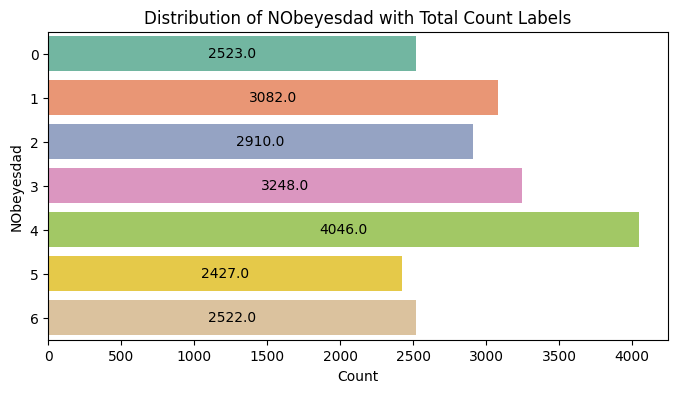

In [ ]:
# Bar chart for NObeyesdad distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(y='NObeyesdad', data=train_data, palette='Set2')

# Add total count labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() / 2, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

plt.title('Distribution of NObeyesdad with Total Count Labels')
plt.xlabel('Count')
plt.ylabel('NObeyesdad')
plt.show()


**Key Observations:**

Class Imbalance: There is a visible imbalance in class distribution, which may impact model performance. For instance, 'Obesity_Type_III' is the most common class, whereas 'Overweight_Level_I' is less frequent.

Data Representation: The visualization emphasizes the need to consider strategies that can address class imbalance during model training, such as weighted loss functions or resampling techniques.

## Feature Selection


In [ ]:
# Subset the selected columns for training data
subset_data_train = train_data.select_dtypes(include=['float64', 'int64'])

subset_data_train.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
Gender,1.000000,0.081677,0.623507,0.118613,0.095786,0.021812,-0.312766,0.023983,-0.046129,0.063349,0.053298,-0.061442,0.238399,0.058696,-0.037345,0.066384,0.046575,-0.091479
Age,0.081677,1.000000,0.015912,0.336900,0.288539,0.069804,0.054832,0.165017,-0.170707,0.064837,-0.000190,-0.119348,-0.209456,-0.303800,0.091794,-0.081758,0.306062,0.369429
Height,0.623507,0.015912,1.000000,0.416677,0.228137,0.115566,-0.071546,0.082152,-0.069003,0.069748,0.183706,-0.095923,0.295278,0.076433,0.089138,0.042744,0.060786,0.098126
Weight,0.118613,0.336900,0.416677,1.000000,0.514147,0.228770,0.245682,0.334141,-0.337331,0.040416,0.317914,-0.185116,-0.084845,-0.086471,0.216673,-0.101711,0.431821,0.941071
family_history_with_overweight,0.095786,0.288539,0.228137,0.514147,1.000000,0.152154,0.047756,0.195042,-0.204263,0.018782,0.191588,-0.166760,-0.094414,0.005762,-0.002330,-0.092433,0.321325,0.498820
FAVC,0.021812,0.069804,0.115566,0.228770,0.152154,1.000000,0.006952,0.044851,-0.115675,-0.016009,0.039167,-0.111897,-0.067030,0.034843,0.080184,-0.121784,0.010176,0.215523
FCVC,-0.312766,0.054832,-0.071546,0.245682,0.047756,0.006952,1.000000,0.122704,0.010870,-0.012191,0.101299,0.022120,-0.089822,-0.147843,0.128793,-0.009250,0.041076,0.296933
NCP,0.023983,0.165017,0.082152,0.334141,0.195042,0.044851,0.122704,1.000000,-0.125616,0.013510,0.106883,-0.062204,-0.115077,-0.027732,0.119509,-0.020830,0.153788,0.332956
CAEC,-0.046129,-0.170707,-0.069003,-0.337331,-0.204263,-0.115675,0.010870,-0.125616,1.000000,0.019703,-0.132820,0.099427,0.092035,0.049646,-0.066821,0.069555,-0.297420,-0.350495
SMOKE,0.063349,0.064837,0.069748,0.040416,0.018782,-0.016009,-0.012191,0.013510,0.019703,1.000000,-0.023475,0.017185,0.008374,-0.016093,0.023254,0.006146,-0.001393,0.013129


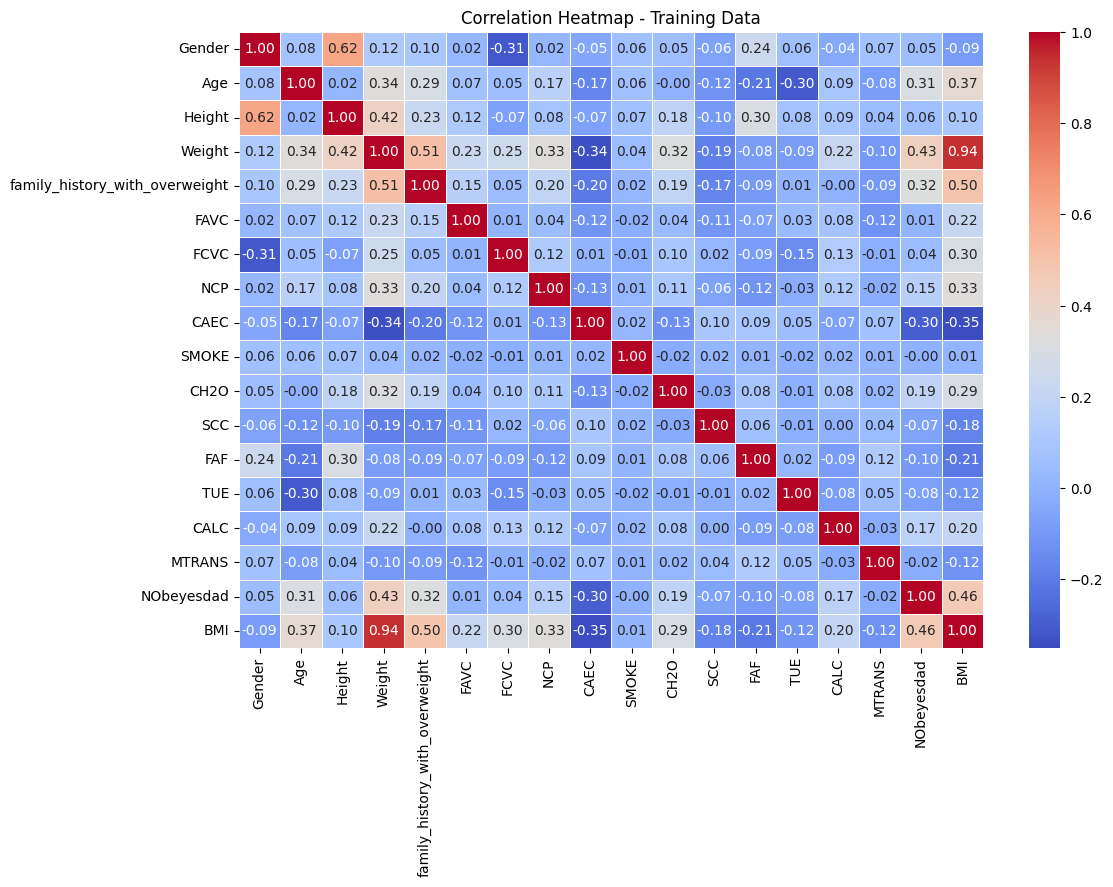

In [ ]:
# Create a correlation heatmap for training data
plt.figure(figsize=(12, 8))
sns.heatmap(subset_data_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Training Data')
plt.show()


**Key Observations from the Heatmap**

- BMI and Weight: There's a strong positive correlation of 0.94 between BMI and Weight, which is expected because BMI is derived from an individual's weight and height.

- Gender and Height: A notable correlation coefficient of 0.62 between Gender and Height may indicate that height is significantly different between genders in this dataset, potentially reflecting biological differences.

- Family History and Weight/BMI: Both Weight and BMI have substantial positive correlations with a family history of overweight (0.51 and 0.50 respectively), suggesting genetic or lifestyle factors within families that influence weight and BMI.

- Negative Correlations: FAF (Physical Activity Frequency) has a negative correlation with Age (-0.21) and TUE (Time Using Technology Devices) (-0.21), which might indicate that younger individuals are more physically active and spend more time with technology.

- NObeyesdad (Target Variable): The correlations with the target variable range from -0.30 with TUE to 0.46 with BMI, suggesting that these variables, especially BMI, are important predictors for obesity levels.

In [ ]:
# Drop columns
train_data = train_data.drop(['BMI'], axis=1)
test_data = test_data.drop(['BMI'], axis=1)

**Justification for Dropping 'BMI'**

- 'BMI' (Body Mass Index) is calculated using both 'Weight' and 'Height.' Since 'Weight' is already present in the dataset, 'BMI' introduces redundancy. Including both features might lead to multicollinearity.

- The correlation between 'Weight' and 'BMI' is very high (approximately 0.94). This strong positive correlation indicates that the two variables provide similar information about the body's mass characteristics. Keeping both features might not add significant value to the model and could lead to overfitting.

- By dropping 'BMI,' we mitigate the risk of multicollinearity, which can impact the stability of regression coefficients and make it challenging to isolate the individual effect of each predictor variable. Removing one of the highly correlated features helps in creating a more stable and robust model.

#### Check the imbalance in the target variable

In [ ]:
# Check the imbalance in the target variable 'NObeyesdad'
target_variable_counts = train_data['NObeyesdad'].value_counts()

# Display the counts
print("Target Variable Distribution:")
print(target_variable_counts)

Target Variable Distribution:
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: NObeyesdad, dtype: int64


- From these counts, it appears that Class 4 has the most instances and Class 5 has the least. This imbalance could potentially affect the performance of a machine learning model trained on this data. The model might be biased towards predicting the majority class (in this case, Class 4), and may not perform well on the minority classes.

In [ ]:
# Calculate the percentage distribution of each class
target_variable_percentage = train_data['NObeyesdad'].value_counts(normalize=True) * 100

# Display the percentage distribution
print("Target Variable Percentage Distribution:")
print(target_variable_percentage)


Target Variable Percentage Distribution:
4    19.491280
3    15.646979
1    14.847288
2    14.018692
0    12.154350
6    12.149533
5    11.691878
Name: NObeyesdad, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = train_data.drop('NObeyesdad', axis=1)
y = train_data['NObeyesdad']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


**Resampling to Address Imbalance:**

To address the imbalance, the RandomOverSampler from the imbalanced-learn library was employed.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=123)

# Fit the sampler and resample the data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Print the new class distribution
print("Resampled Target Variable Distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled Target Variable Distribution:
4    3228
6    3228
0    3228
5    3228
1    3228
3    3228
2    3228
Name: NObeyesdad, dtype: int64


- Resampling process using the RandomOverSampler has successfully balanced the target variable distribution, with each class now having the same number of instances (3228 in this case).

In [ ]:
# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (16606, 16) Target: (16606,)
Testing set - Features: (4152, 16) Target: (4152,)


- The original training set had 16,606 instances and 16 features.
- The testing set has 4,152 instances and 16 features.


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
# Fit on training data and transform both training and test data
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

- The resulting X_train_scaled and X_test_scaled datasets contain standardized feature values, making them suitable for training and evaluating machine learning models that are sensitive to the scale of input features. Feature scaling is especially important for algorithms like support vector machines, k-nearest neighbors, and neural networks.

# Model Training and Evaluation

### ANN:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Create a Sequential model for Artificial Neural Network (ANN)
model_ANN = Sequential()

# Add the input layer
model_ANN.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model_ANN.add(Dense(units=32, activation='relu'))

# Add the output layer (use 'softmax' for multi-class classification)
model_ANN.add(Dense(units=7, activation='softmax'))


In [ ]:
# Display the summary of the ANN model
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 3399 (13.28 KB)
Trainable params: 3399 (13.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


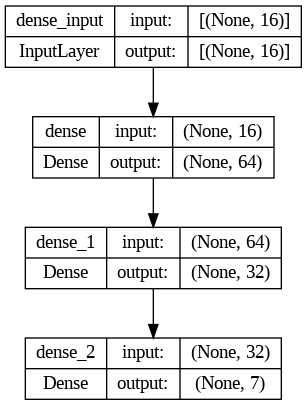

In [ ]:
import tensorflow as tf
# Plot the structure of the ANN model
tf.keras.utils.plot_model(model_ANN, show_shapes=True, show_layer_names=True)


**ANN Model Summary:**
- The ANN is a simpler model with three layers.
- The first layer is a dense layer with 64 neurons and uses the ReLU activation function. It's responsible for receiving the input and beginning the pattern recognition process.
- The second layer is also a dense layer but with 32 neurons, continuing the pattern processing with the ReLU activation function.
- The final layer is a dense layer with 7 neurons corresponding to the 7 output classes, using the softmax activation function to output probabilities for each class.
- The ANN has a total of 3,399 parameters, which are relatively few, suggesting a lighter model that requires less computational power to train.
- The model's simplicity makes it fast and efficient, but it may not capture complex patterns as effectively as a deeper model.

In [ ]:
# Compile the ANN model with specified loss, optimizer, and metrics
model_ANN.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [ ]:
def plot_history(history):
    # Plot the training and validation loss over epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Train loss vs Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    # Plot the training and validation accuracy over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Train accuracy vs Validation Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
# Train the ANN model and store the training history
history_ANN = model_ANN.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
519/519 [==============================] - 2s 3ms/step - loss: 0.8440 - accuracy: 0.6932 - val_loss: 0.5351 - val_accuracy: 0.8011
Epoch 2/50
519/519 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.8338 - val_loss: 0.4196 - val_accuracy: 0.8398
Epoch 3/50
519/519 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8567 - val_loss: 0.3960 - val_accuracy: 0.8550
Epoch 4/50
519/519 [==============================] - 1s 3ms/step - loss: 0.3819 - accuracy: 0.8669 - val_loss: 0.3933 - val_accuracy: 0.8572
Epoch 5/50
519/519 [==============================] - 1s 3ms/step - loss: 0.3703 - accuracy: 0.8714 - val_loss: 0.3848 - val_accuracy: 0.8625
Epoch 6/50
519/519 [==============================] - 2s 4ms/step - loss: 0.3625 - accuracy: 0.8738 - val_loss: 0.3830 - val_accuracy: 0.8658
Epoch 7/50
519/519 [==============================] - 2s 4ms/step - loss: 0.3574 - accuracy: 0.8750 - val_loss: 0.3763 - val_accuracy: 0.8697
Epoch 

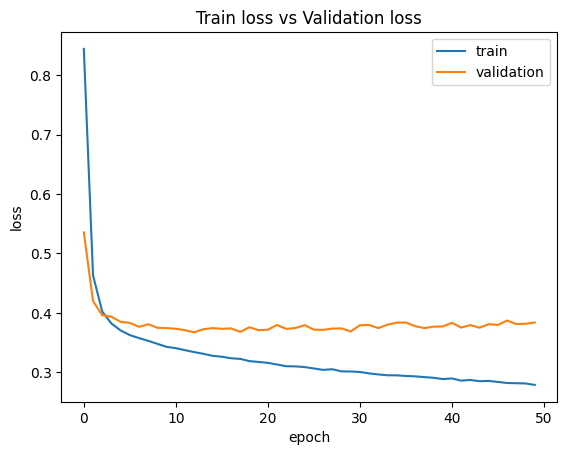

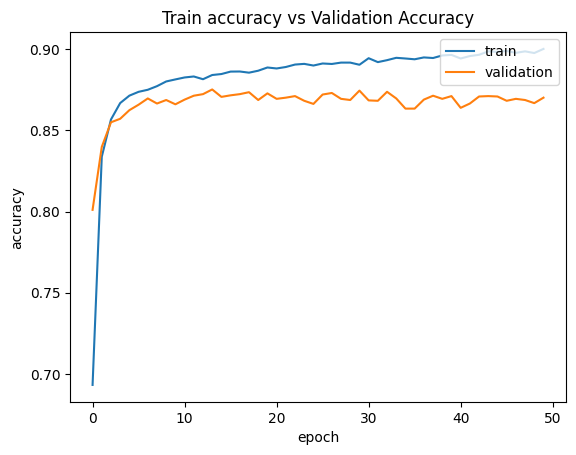

In [ ]:
# Plot the training history of the ANN model
plot_history(history_ANN)

**Insights from ANN Training History:**
- The ANN model started with a validation accuracy of 80.11% and a loss of 0.5351, showing that it was already quite effective after the first epoch.
- Over the 50 epochs, there was a consistent improvement in both training and validation accuracy, with the latter reaching a peak accuracy of 87.52% at epoch 14 before fluctuating slightly.
- The training loss decreased steadily, reflecting the model's growing proficiency at classifying the training data.
- The validation loss decreased and then plateaued, with minor fluctuations indicative of the model's generalization performance on unseen data.
- The final validation accuracy settled at 87.02%, which is a strong performance, although it suggests a slight decline from the peak, potentially indicating some overfitting as the model continued to learn specific details from the training data.

In [ ]:
# Evaluate the ANN model on the test set
test_loss_ANN, test_accuracy_ANN = model_ANN.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss_ANN}, Test Accuracy: {test_accuracy_ANN}")

130/130 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8702
Test Loss: 0.383637011051178, Test Accuracy: 0.8701830506324768


In [ ]:
# Predict on the test data using the trained ANN model
y_pred_ANN = model_ANN.predict(X_test_scaled)
predicted_labels_ANN = np.argmax(y_pred_ANN, axis=-1)

130/130 [==============================] - 0s 1ms/step


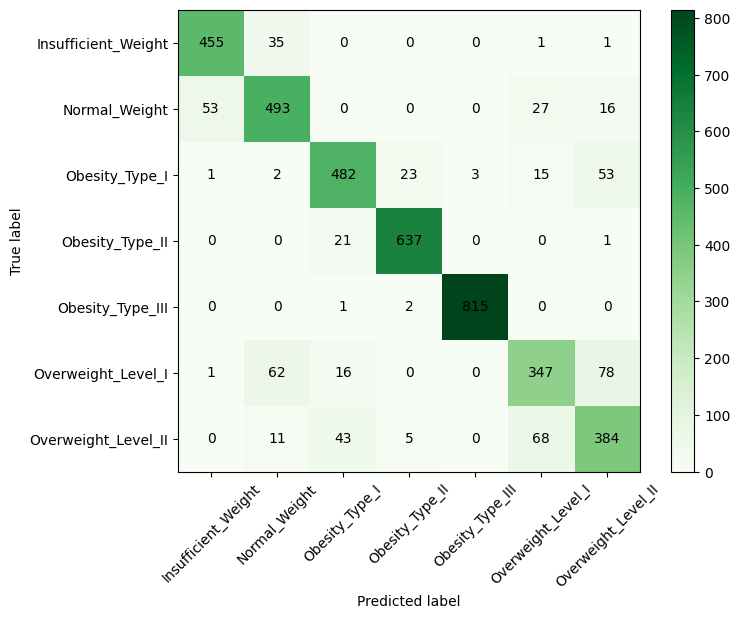

In [ ]:
# Create the confusion matrix for the ANN model
conf_matrix_ANN = confusion_matrix(y_test, predicted_labels_ANN)

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_ANN, interpolation='nearest', cmap=plt.cm.Greens)

classes = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate each cell with the count
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_ANN[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.show()

**Artificial Neural Network (ANN) Insights:**
- The ANN model performs very well in identifying the extreme classes, such as 'Obesity_Type_III' (highest weight category) with the majority of the instances being correctly classified. This suggests that the features that define these extremes are well-learned by the ANN model.

- There is some confusion between adjacent classes, such as 'Obesity_Type_I' and 'Obesity_Type_II', as well as between 'Overweight_Level_I' and 'Overweight_Level_II'. This is understandable as the physiological differences between these adjacent classes may be subtle and harder for the model to distinguish.

- The 'Overweight_Level_I' class seems to have a significant number of instances misclassified as 'Normal_Weight' and 'Overweight_Level_II', indicating that the model might be struggling to define the boundaries of this class.



In [ ]:
# Print classification report for the ANN model
print("Classification Report:")
print(classification_report(y_test, predicted_labels_ANN, target_names=classes))

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.92      0.91       492
      Normal_Weight       0.82      0.84      0.83       589
     Obesity_Type_I       0.86      0.83      0.84       579
    Obesity_Type_II       0.96      0.97      0.96       659
   Obesity_Type_III       1.00      1.00      1.00       818
 Overweight_Level_I       0.76      0.69      0.72       504
Overweight_Level_II       0.72      0.75      0.74       511

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



**Evaluation Report for ANN Model:**
- The ANN model achieved an overall accuracy of 87%, indicating strong predictive performance across all classes.
- Obesity_Type_III had a perfect precision and recall, showing the model's exceptional ability to identify this class without errors.
- The model was most challenged by the Overweight_Level_I and Overweight_Level_II classes, with the lowest recall and precision scores respectively. This suggests some confusion between these classes and potentially others.
- The high f1-scores for Insufficient_Weight and Obesity_Type_II indicate a balanced precision-recall performance for these classes.
- The macro and weighted averages of precision, recall, and f1-score are consistent with the overall accuracy, highlighting the model's balanced performance across various classes.

### DNN:

In [ ]:
# Create a Sequential model for Deep Neural Network (DNN)
model_DNN = Sequential()

# Add the input layer
model_DNN.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model_DNN.add(Dropout(0.5))  # Adding dropout with a dropout rate of 0.5

model_DNN.add(Dense(units=128, activation='relu'))
model_DNN.add(Dropout(0.5))

model_DNN.add(Dense(units=64, activation='relu'))
model_DNN.add(Dropout(0.5))

model_DNN.add(Dense(units=32, activation='relu'))
model_DNN.add(Dropout(0.5))

# Add the output layer (use 'softmax' for multi-class classification)
model_DNN.add(Dense(units=7, activation='softmax'))

In [ ]:
# Display the summary of the DNN model
model_DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

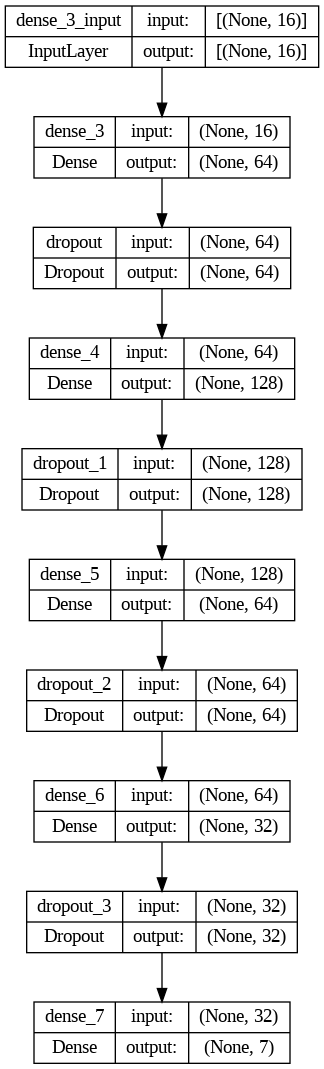

In [ ]:
import tensorflow as tf
# Plot the structure of the DNN model
tf.keras.utils.plot_model(model_DNN, show_shapes=True, show_layer_names=True)


**DNN Model Summary:**
- The DNN is a more complex and deep model with multiple layers, including dropout layers to prevent overfitting.
- It starts with a dense layer of 64 neurons (similar to the ANN), followed by a dropout layer to reduce overfitting.
- The next layer is a dense layer with 128 neurons, which significantly increases the model's capacity to learn from data.
- Another dropout layer follows, continuing the pattern of dense layer followed by dropout to enhance generalization.
- The model then scales down with a 64-neuron dense layer and another dropout layer.
- A final dense layer of 32 neurons precedes the last dropout layer, after which the output layer of 7 neurons with softmax activation outputs the class probabilities.
- The DNN has a total of 19,975 parameters, which is considerably more than the ANN, making the model more complex and potentially better at capturing complex patterns at the cost of being computationally more intensive.
- This increased complexity provides the model with more flexibility to learn from the data but also increases the risk of overfitting, which the dropout layers are designed to mitigate.

In [ ]:
# Compile the DNN model with specified loss, optimizer, and metrics
model_DNN.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [ ]:
def plot_history(history):
    # Plot the training and validation loss over epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Train loss vs Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    # Plot the training and validation accuracy over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Train accuracy vs Validation Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
# Train the DNN model and store the training history
history_DNN = model_DNN.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
519/519 [==============================] - 3s 4ms/step - loss: 1.5614 - accuracy: 0.3765 - val_loss: 0.9865 - val_accuracy: 0.6045
Epoch 2/50
519/519 [==============================] - 2s 3ms/step - loss: 1.0831 - accuracy: 0.5475 - val_loss: 0.7580 - val_accuracy: 0.7401
Epoch 3/50
519/519 [==============================] - 2s 4ms/step - loss: 0.9091 - accuracy: 0.6257 - val_loss: 0.6444 - val_accuracy: 0.8119
Epoch 4/50
519/519 [==============================] - 3s 5ms/step - loss: 0.8068 - accuracy: 0.6723 - val_loss: 0.5812 - val_accuracy: 0.8300
Epoch 5/50
519/519 [==============================] - 3s 5ms/step - loss: 0.7410 - accuracy: 0.7041 - val_loss: 0.5605 - val_accuracy: 0.8153
Epoch 6/50
519/519 [==============================] - 2s 3ms/step - loss: 0.7241 - accuracy: 0.7198 - val_loss: 0.5397 - val_accuracy: 0.8283
Epoch 7/50
519/519 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.7337 - val_loss: 0.5351 - val_accuracy: 0.8158
Epoch 

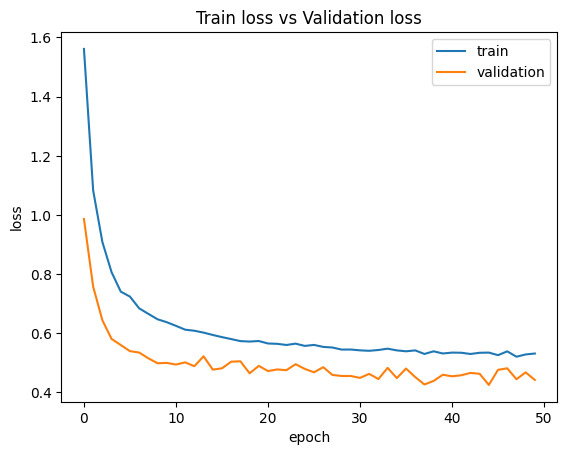

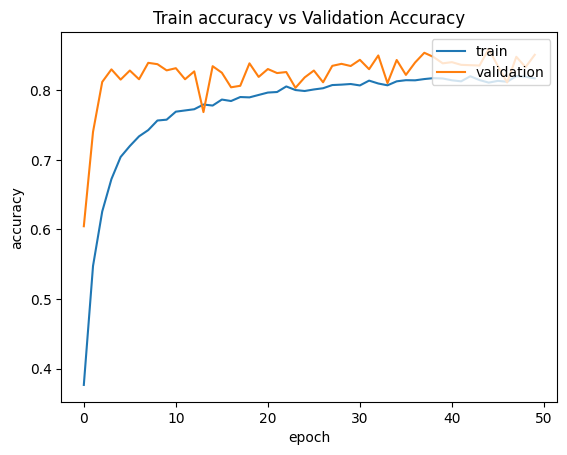

In [ ]:
# Plot the training history of the DNN model
plot_history(history_DNN)

**Insights from DNN Training History:**
- The DNN model began with a lower validation accuracy of 60.45% compared to the ANN model, which could be due to its higher complexity and need for more training to optimize its deeper structure.
- The validation accuracy for the DNN model saw a significant increase over time, reaching a peak accuracy of 85.93% by epoch 45, demonstrating a notable improvement and learning capacity of the model.
- The training and validation losses for the DNN model exhibited a decrease over time, but with some upward spikes in the validation loss, suggesting moments of overfitting to the training data. The model may benefit from additional regularization or a change in the dropout rate.
- Despite the complexity of the DNN model, the final validation accuracy was quite high at 85.09%, showing that it was capable of generalizing well to the test data.
- The DNN model took longer to train due to its depth and dropout layers, which add to the computational load.

In [ ]:
# Evaluate the DNN model on the test set
test_loss_DNN, test_accuracy_DNN = model_DNN.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss_DNN}, Test Accuracy: {test_accuracy_DNN}")

130/130 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8509
Test Loss: 0.44246700406074524, Test Accuracy: 0.8509151935577393


In [ ]:
# Predict on the test data using the trained DNN model
y_pred_DNN = model_DNN.predict(X_test_scaled)
predicted_labels_DNN = np.argmax(y_pred_DNN, axis=-1)

130/130 [==============================] - 0s 2ms/step


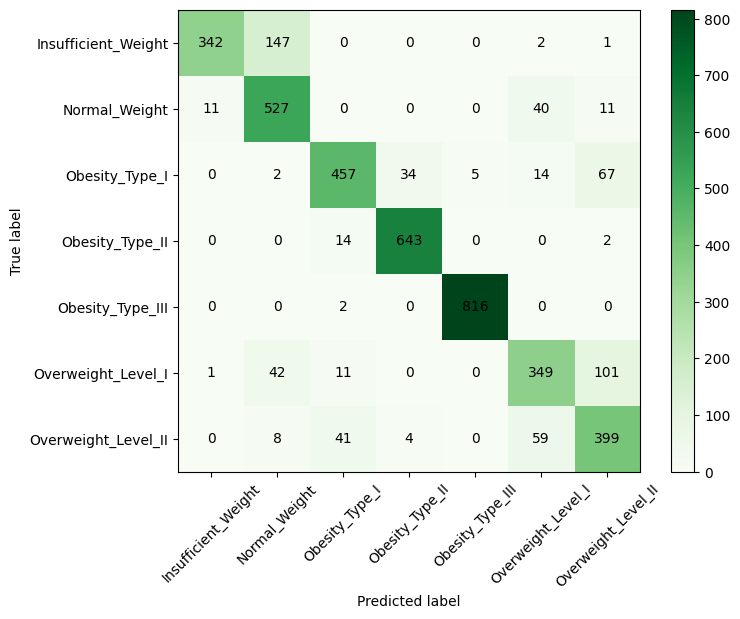

In [ ]:
# Create the confusion matrix for the DNN model
conf_matrix_DNN = confusion_matrix(y_test, predicted_labels_DNN)

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_DNN, interpolation='nearest', cmap=plt.cm.Greens)

classes = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate each cell with the count
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_DNN[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.show()

**Deep Neural Network (DNN) Insights:**
- Compared to the ANN, the DNN has improved its classification of the 'Normal_Weight' category with fewer instances misclassified as 'Overweight_Level_I'. This suggests that the additional complexity of the DNN model might be capturing the nuances of this category better.

- Similar to the ANN model, the DNN also confuses adjacent weight classes, though the number of misclassifications for 'Obesity_Type_I' and 'II' has decreased slightly, indicating some improvement.

- For the DNN model, there's a notable number of instances from 'Overweight_Level_II' being misclassified as 'Overweight_Level_I'. This may require further investigation into the features that distinguish these two classes.

- Like the ANN, the DNN model also performs well on the 'Obesity_Type_III' class, further confirming that features representing this class are distinct and well-learned.

In [ ]:
# Print classification report for the DNN model
print("Classification Report for DNN:")
print(classification_report(y_test, predicted_labels_DNN, target_names=classes))

Classification Report for DNN:
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.70      0.81       492
      Normal_Weight       0.73      0.89      0.80       589
     Obesity_Type_I       0.87      0.79      0.83       579
    Obesity_Type_II       0.94      0.98      0.96       659
   Obesity_Type_III       0.99      1.00      1.00       818
 Overweight_Level_I       0.75      0.69      0.72       504
Overweight_Level_II       0.69      0.78      0.73       511

           accuracy                           0.85      4152
          macro avg       0.85      0.83      0.84      4152
       weighted avg       0.86      0.85      0.85      4152



**Evaluation Report for DNN Model:**
- The DNN model had an overall accuracy of 85%, slightly lower than the ANN model, but still indicative of robust predictive capabilities.
- Similar to the ANN, the Obesity_Type_III class had almost perfect metrics, reinforcing the model's strength in identifying this class.
The model showed a notably high precision for the Insufficient_Weight class, but the recall is lower compared to the ANN model, which may indicate some false negatives.
- The Normal_Weight class showed an excellent recall but lower precision, suggesting that while most actual Normal Weight instances are correctly identified, there are more false positives for this class.
- Overweight_Level_I and Overweight_Level_II again presented challenges with relatively lower precision and recall scores, suggesting that the DNN model also confused these classes with others.
- The macro average f1-score is slightly lower than the weighted average, which could be due to the lower performance in the Overweight_Level_I and Overweight_Level_II classes having a stronger impact on the unweighted calculation.

## Support Vector Machines (SVM):

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Feature selection using RFE
rfe = RFE(svm_model, n_features_to_select=12)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Get the selected feature names
selected_features_svm = X_train.columns[rfe.support_]
# Print selected features for SVM
print("Selected Features for SVM:")
print(selected_features_svm)

Selected Features for SVM:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'CALC'],
      dtype='object')


In [ ]:
# Apply PCA to the RFE-transformed features
pca = PCA(n_components=6)  # 6 desired number of components
X_train_combined = pca.fit_transform(X_train_rfe)
X_test_combined = pca.transform(X_test_rfe)

In [ ]:
# Create a DataFrame to display the contribution of each original feature to the principal components
pca_components_df = pd.DataFrame(pca.components_, columns=selected_features_svm)

# Display the DataFrame
print("PCA Components:")
print(pca_components_df)

PCA Components:
     Gender       Age    Height    Weight  family_history_with_overweight  \
0 -0.208691 -0.282485 -0.350069 -0.533354                       -0.407365   
1  0.553328 -0.203228  0.479632 -0.091405                       -0.064342   
2 -0.205609 -0.417992  0.115900  0.105351                       -0.168012   
3  0.133027  0.021918  0.152245 -0.032064                       -0.318897   
4  0.199937  0.284649  0.079022 -0.012007                       -0.056136   
5  0.009311 -0.106874 -0.122428 -0.067373                       -0.280964   

       FAVC      FCVC       NCP      CAEC      CH2O       FAF      CALC  
0 -0.198285 -0.098735 -0.275050  0.282203 -0.261021  0.041832 -0.171613  
1 -0.042966 -0.358346 -0.167279  0.097478  0.044755  0.466608 -0.150054  
2 -0.119240  0.531337  0.045342  0.195285  0.443887  0.355296  0.265042  
3  0.375454 -0.029809 -0.016747  0.161820 -0.356848 -0.110799  0.740260  
4 -0.732709  0.075109  0.432711  0.291974 -0.176257 -0.057618  0.141711  


**Feature Selection:**

Used RFE to select 12 most significant features, followed by PCA for dimensionality reduction to 6 principal components.

In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 'scale', 'auto']}

# Initialize SVM model
svm_model_tuned = SVC()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model_tuned, param_grid_svm, cv=5, scoring='accuracy')


In [ ]:
# Fit the model on the training data with combined features
grid_search_svm.fit(X_train_combined, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

**Model Tuning:**

Employed GridSearchCV to find the best hyperparameters with a linear kernel showing promising results.

In [ ]:
# Get the best parameters
best_params_svm = grid_search_svm.best_params_
# Get the best model
best_model_svm = grid_search_svm.best_estimator_

# Display the results of the tuned model
print("Tuned SVM Model:")
print("Best Parameters:", best_params_svm)
print("Best Model Parameters:\n", best_model_svm.get_params())


Tuned SVM Model:
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Model Parameters:
 {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Make predictions on the test data
svm_predictions_tuned = best_model_svm.predict(X_test_combined)


In [ ]:
# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_predictions_tuned)
svm_classification_report = classification_report(y_test, svm_predictions_tuned)

print("SVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n", svm_classification_report)


SVM Accuracy: 0.7427745664739884

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       492
           1       0.55      0.60      0.57       589
           2       0.74      0.72      0.73       579
           3       0.91      0.93      0.92       659
           4       1.00      0.99      1.00       818
           5       0.50      0.46      0.48       504
           6       0.58      0.56      0.57       511

    accuracy                           0.74      4152
   macro avg       0.72      0.72      0.72      4152
weighted avg       0.74      0.74      0.74      4152



**Support Vector Machines (SVM):**

- Accuracy: 74.28%
- Performance: SVM demonstrates moderate overall accuracy with decent precision and recall across the classes. It shows commendable precision for Obesity_Type_III and a balance between precision and recall for Insufficient_Weight. It performs less optimally for Normal_Weight and Overweight_Level_I, suggesting difficulties in distinguishing these categories.

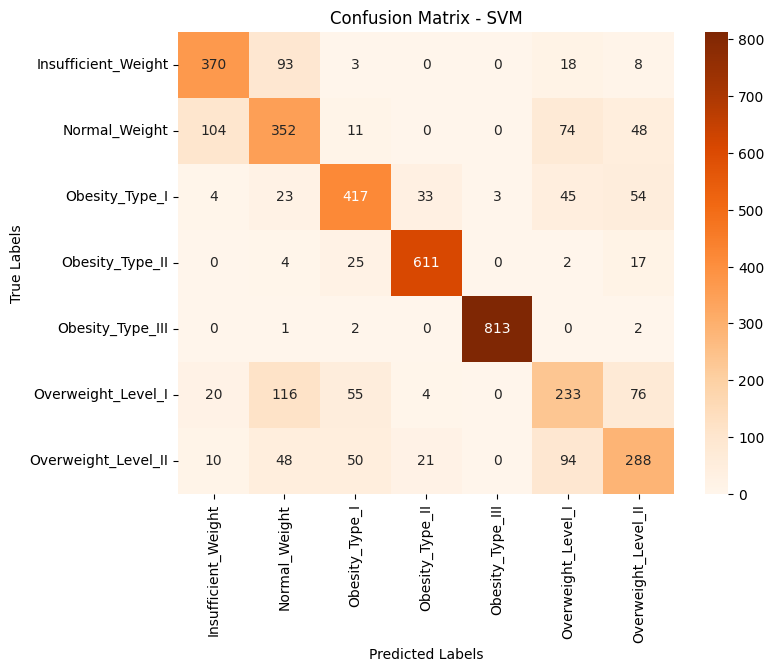

In [ ]:
from sklearn.metrics import confusion_matrix

classes = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

def plot_confusion_matrix(model_predictions, model_name):
    cm = confusion_matrix(y_test, model_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# Plot confusion matrix for SVM
plot_confusion_matrix(svm_predictions_tuned, 'SVM')


**SVM Model Insights:**

- The SVM model has more misclassifications across almost all classes compared to the Decision Tree and Random Forest models, particularly within 'Insufficient_Weight' and 'Normal_Weight', which suggests it struggles with these distinctions.
- 'Obesity_Type_II' is relatively well classified, but not as well as by the tree-based models.
- 'Overweight_Level_I' and 'Overweight_Level_II' also see considerable confusion, indicating that the linear separation that SVM provides might not be sufficient for these classes.

## Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=123)

# Fit Decision Tree on the training data
dt_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances_dt = dt_model.feature_importances_

# Get indices of top 12 features
selected_features_dt_indices = np.argsort(feature_importances_dt)[-12:]

# Get the selected feature names
selected_features_dt = X_train.columns[selected_features_dt_indices]


In [ ]:
# Print selected features for Decision Tree
print("Selected Features for Decision Tree:")
print(selected_features_dt)

# No PCA for Decision Tree


Selected Features for Decision Tree:
Index(['NCP', 'FAVC', 'CAEC', 'CALC', 'TUE', 'FAF', 'FCVC', 'CH2O', 'Age',
       'Height', 'Gender', 'Weight'],
      dtype='object')


**Feature Selection:**

Decision Trees naturally perform feature selection based on feature importances derived during the training process.

In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Initialize Decision Tree model
dt_model_tuned = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt_model_tuned, param_grid_dt, cv=5, scoring='accuracy')


In [ ]:
# Fit the model on the training data with selected features
grid_search_dt.fit(X_train_scaled[:, selected_features_dt_indices], y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

**Model Tuning:**

GridSearchCV was utilized to optimize the tree depth and leaf parameters.

In [ ]:
# Get the best parameters
best_params_dt = grid_search_dt.best_params_
# Get the best model
best_model_dt = grid_search_dt.best_estimator_

# Display the results of the tuned model
print("Tuned Decision Tree Model:")
print("Best Parameters:", best_params_dt)
print("Best Model Parameters:\n", best_model_dt.get_params())


Tuned Decision Tree Model:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Model Parameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# Make predictions on the test data
dt_predictions_tuned = best_model_dt.predict(X_test_scaled[:, selected_features_dt_indices])


In [ ]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions_tuned)
dt_classification_report = classification_report(y_test, dt_predictions_tuned)

print("\nDecision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:\n", dt_classification_report)


Decision Tree Accuracy: 0.8740366088631984

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       492
           1       0.82      0.84      0.83       589
           2       0.84      0.84      0.84       579
           3       0.94      0.96      0.95       659
           4       1.00      0.99      1.00       818
           5       0.75      0.75      0.75       504
           6       0.77      0.75      0.76       511

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



**Decision Tree (DT):**

- Accuracy: 87.40%
- Performance: The Decision Tree model exhibits a significant improvement in accuracy over SVM. It shows high precision for Obesity_Type_III and a good balance for Obesity_Type_II and Insufficient_Weight, indicating robust class separation. There is a slight decrease in performance for Overweight_Level_I and II, indicating some confusion between these classes.


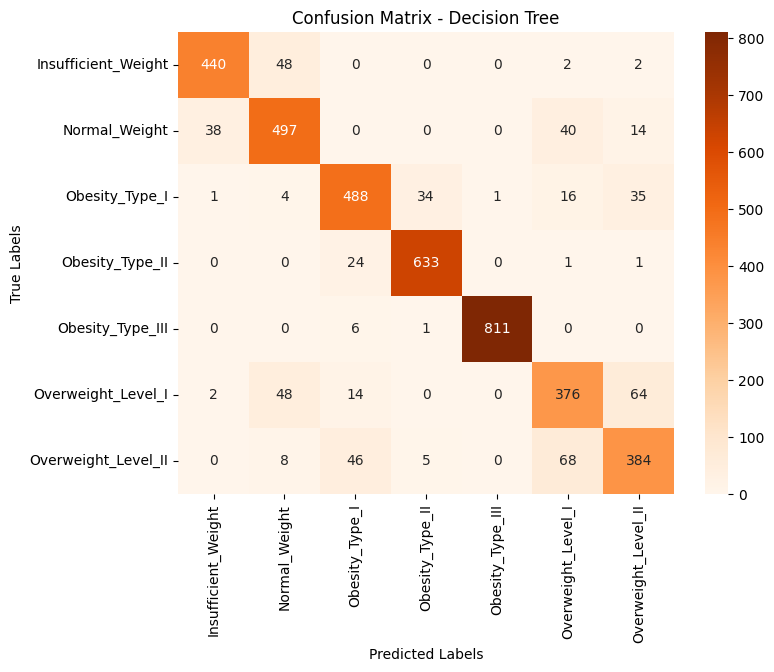

In [ ]:
# Plot confusion matrix for Decision Tree
plot_confusion_matrix(dt_predictions_tuned, 'Decision Tree')


**Decision Tree Model Insights:**

- Shows strong performance in distinguishing 'Obesity_Type_III' with very high true positive counts and minimal misclassification.
- Has a moderate misclassification between 'Normal_Weight' and 'Overweight_Level_I' and 'Overweight_Level_II', suggesting some confusion between these neighboring classes.
- 'Obesity_Type_I' is sometimes mistaken for 'Obesity_Type_II' and 'Overweight_Level_II', indicating possible overlaps in features between these classes.

## Ensemble of Classifiers:

### Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=123)

# Fit Random Forest on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Get indices of top 12 features
selected_features_rf_indices = np.argsort(feature_importances_rf)[-12:]

# Get the selected feature names
selected_features_rf = X_train.columns[selected_features_rf_indices]


In [ ]:
# Print selected features for Random Forest
print("Selected Features for Random Forest:")
print(selected_features_rf)

# No PCA for Random Forest


Selected Features for Random Forest:
Index(['NCP', 'CALC', 'CAEC', 'family_history_with_overweight', 'FAF', 'TUE',
       'CH2O', 'Gender', 'Age', 'FCVC', 'Height', 'Weight'],
      dtype='object')


**Feature Selection:**

Similar to Decision Trees, Random Forest also provided feature importances and selected the top features accordingly.

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [100, 150, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Initialize Random Forest model
rf_model_tuned = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=5, scoring='accuracy')


In [ ]:
# Fit the model on the training data with selected features
grid_search_rf.fit(X_train_scaled[:, selected_features_rf_indices], y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

**Model Tuning:**

A broader range of hyperparameters including the number of trees and tree depth were optimized through GridSearchCV.

In [ ]:
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Display the results of the tuned model
print("Tuned Random Forest Model:")
print("Best Parameters:", best_params_rf)
print("Best Model Parameters:\n", best_model_rf.get_params())

Tuned Random Forest Model:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Parameters:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Make predictions on the test data
rf_predictions_tuned = best_model_rf.predict(X_test_scaled[:, selected_features_rf_indices])



In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions_tuned)
rf_classification_report = classification_report(y_test, rf_predictions_tuned)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", rf_classification_report)



Random Forest Accuracy: 0.8935452793834296

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       492
           1       0.85      0.89      0.87       589
           2       0.88      0.86      0.87       579
           3       0.96      0.97      0.97       659
           4       1.00      1.00      1.00       818
           5       0.78      0.74      0.76       504
           6       0.78      0.78      0.78       511

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152



**Random Forest (RF):**

- Accuracy: 89.35%
- Performance: Random Forest outperforms the Decision Tree, likely due to its ensemble approach which helps reduce overfitting. It shows exceptional precision and recall for Obesity_Type_II and III, indicating that it can effectively distinguish these classes. Overweight levels show a slight improvement compared to the Decision Tree model.


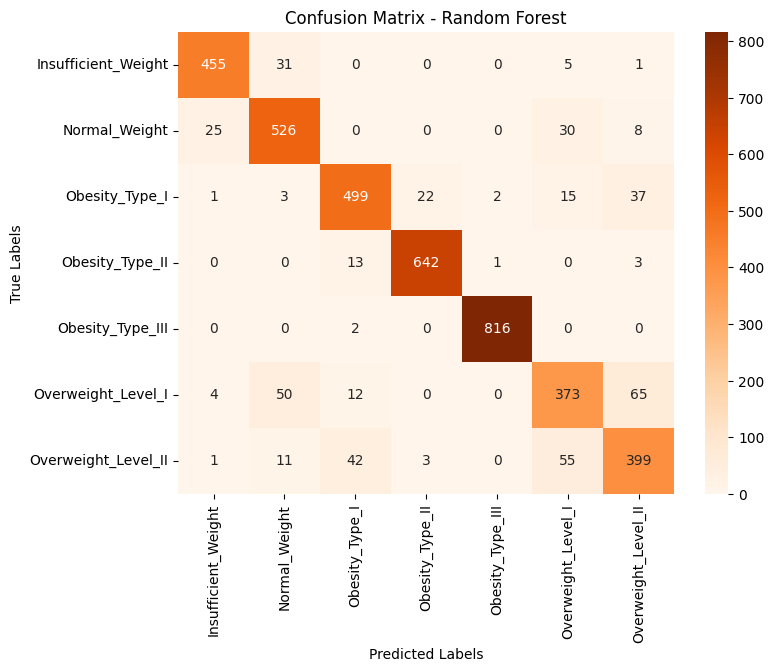

In [ ]:
# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_predictions_tuned, 'Random Forest')


**Random Forest Model Insights:**

- The Random Forest model seems to perform better than the Decision Tree, especially in distinguishing between 'Normal_Weight' and the overweight categories.
- 'Overweight_Level_I' is sometimes confused with 'Normal_Weight', which may reflect challenges in classifying borderline cases.
- 'Obesity_Type_I' shows better classification compared to the Decision Tree model, but still has some misclassification with 'Obesity_Type_II'.

### Extreme Gradient Boost:

In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=123)

# Fit XGBoost on the training data
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Get indices of top 12 features
selected_features_xgb_indices = np.argsort(feature_importances_xgb)[-12:]

# Get the selected feature names
selected_features_xgb = X_train.columns[selected_features_xgb_indices]


In [ ]:
# Print selected features for XGBoost
print("Selected Features for XGBoost:")
print(selected_features_xgb)

# No PCA for XGBoost


Selected Features for XGBoost:
Index(['family_history_with_overweight', 'Age', 'CAEC', 'CH2O', 'SCC', 'NCP',
       'CALC', 'FAVC', 'Height', 'FCVC', 'Weight', 'Gender'],
      dtype='object')


**Feature Selection:**

Leveraged XGBoost's built-in feature importance to highlight significant predictors.

In [ ]:
# Define the parameter grid for XGBoost
param_grid_xgb = {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.5]}

# Initialize XGBoost model
xgb_model_tuned = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model_tuned, param_grid_xgb, cv=5, scoring='accuracy')


In [ ]:
# Fit the model on the training data with selected features
grid_search_xgb.fit(X_train_scaled[:, selected_features_xgb_indices], y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

**Model Tuning:**

Explored various settings of n_estimators, max_depth, and learning rate for optimal results.

In [ ]:
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_

# Display the results of the tuned model
print("Tuned XGBoost Model:")
print("Best Parameters:", best_params_xgb)
print("Best Model Parameters:\n", best_model_xgb.get_params())


Tuned XGBoost Model:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Model Parameters:
 {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 've

In [ ]:
# Make predictions on the test data
xgb_predictions_tuned = best_model_xgb.predict(X_test_scaled[:, selected_features_xgb_indices])


In [ ]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions_tuned)
xgb_classification_report = classification_report(y_test, xgb_predictions_tuned)

print("\nXGBoost Accuracy:", xgb_accuracy)
print("\nXGBoost Classification Report:\n", xgb_classification_report)



XGBoost Accuracy: 0.9053468208092486

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       492
           1       0.87      0.89      0.88       589
           2       0.88      0.86      0.87       579
           3       0.96      0.98      0.97       659
           4       1.00      1.00      1.00       818
           5       0.82      0.79      0.80       504
           6       0.81      0.83      0.82       511

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



**Extreme Gradient Boosting (XGBoost):**

- Accuracy: 90.53%
- Performance: XGBoost achieves the highest accuracy among the models evaluated, with high precision and recall across all classes. It shows outstanding performance particularly for Obesity_Type_III with perfect scores, and it also shows improvement for Overweight levels compared to other models, indicating its strong classification capability even for more challenging distinctions.

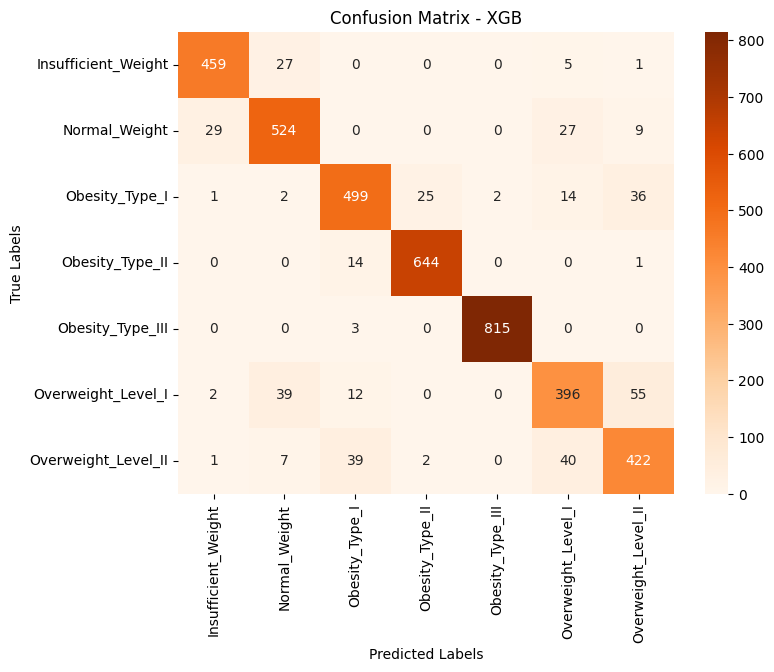

In [ ]:
# Plot confusion matrix for xgb
plot_confusion_matrix(xgb_predictions_tuned, 'XGB')


**XGBoost Model Insights:**

- XGBoost shows a strong performance, particularly in correctly classifying 'Obesity_Type_III'.
- There is some misclassification between 'Normal_Weight' and 'Overweight_Level_I' & 'Overweight_Level_II', similar to other models, which suggests inherent difficulty in separating these classes with the given features.
- Overall, XGBoost seems to balance the misclassification rate across classes better than the SVM and performs comparably to the Random Forest model.

In [ ]:
# Create a DataFrame
model_accuracy_df = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'XGB', 'ANN', 'DNN'],
    'Accuracy': [svm_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, test_accuracy_ANN, test_accuracy_DNN]
})

# Sort the DataFrame by the 'Accuracy' column in descending order
model_accuracy_df = model_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Add a 'Rank' column based on the sorting order
model_accuracy_df['Rank'] = range(1, len(model_accuracy_df) + 1)

# Print the ranked models
print("Ranked Models:")
print(model_accuracy_df[['Model', 'Accuracy', 'Rank']])


Ranked Models:
           Model  Accuracy  Rank
3            XGB  0.905347     1
2  Random Forest  0.893545     2
1  Decision Tree  0.874037     3
4            ANN  0.870183     4
5            DNN  0.850915     5
0            SVM  0.742775     6


**Success Model:**

XGBoost emerges as the most successful model due to its high accuracy, robustness against overfitting, and good class-wise performance. Its ability to handle different data distributions and to provide feature importance metrics makes it a strong candidate for this classification task.

In [ ]:
best_final_model = xgb.XGBClassifier(**best_params_xgb)

best_final_model.fit(X_train_scaled[:, selected_features_xgb_indices], y_train)
predictions_best_final_model = best_final_model.predict(X_test_scaled[:, selected_features_xgb_indices])
best_final_model_accuracy = accuracy_score(y_test, predictions_best_final_model)
print("\nBest Model Accuracy: {:.2%}".format(best_final_model_accuracy))



Best Model Accuracy: 90.53%


Feature Importances:
family_history_with_overweight: 0.019052494317293167
Age: 0.022963741794228554
CAEC: 0.02885947935283184
CH2O: 0.02526024356484413
SCC: 0.027333134785294533
NCP: 0.026466568931937218
CALC: 0.028917642310261726
FAVC: 0.042272455990314484
Height: 0.03374301642179489
FCVC: 0.17322705686092377
Weight: 0.25066736340522766
Gender: 0.321236789226532


<ipython-input-145-a2ab21bf12c2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='flare_r')


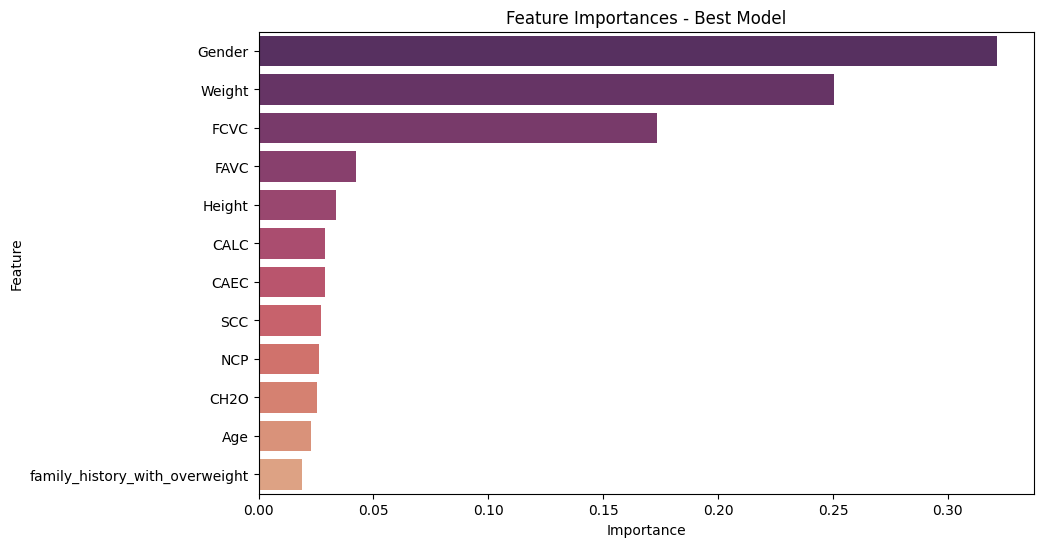

In [ ]:
# Print and visualize feature importances for Best model

# Print feature importances
feature_importances = best_final_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(selected_features_xgb, feature_importances):
    print(f"{feature}: {importance}")

# Get the selected feature names
selected_feature_names = X_train.columns[selected_features_xgb_indices]
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='flare_r')
plt.title('Feature Importances - Best Model')
plt.show()


# Prediction on Test data

In [ ]:
# Apply the same feature selection on the test data
selected_features_test_data = test_data.iloc[:, selected_features_xgb_indices]

In [ ]:
# Make predictions using the trained best model on the selected_features_test_data
test_predictions = best_final_model.predict(selected_features_test_data)


In [ ]:
# Assign the predictions to the 'NObeyesdad' column in the sample_submission DataFrame
sample_submission['NObeyesdad'] = test_predictions


In [ ]:
# Mapping dictionary for label conversion from integer labels to the original labels
LABEL_MAPPING = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# Map integer labels to the corresponding original labels in the 'NObeyesdad' column
sample_submission['NObeyesdad'] = sample_submission['NObeyesdad'].map(LABEL_MAPPING)


In [ ]:
# Save the submission DataFrame to a CSV file named 'submission.csv' without index
sample_submission.to_csv('submission.csv', index=False)


In [ ]:
# Display the first few rows of the submission DataFrame
sample_submission.head(10)


,id,NObeyesdad
0,20758,Obesity_Type_I
1,20759,Obesity_Type_I
2,20760,Obesity_Type_I
3,20761,Obesity_Type_I
4,20762,Obesity_Type_I
5,20763,Obesity_Type_I
6,20764,Obesity_Type_III
7,20765,Obesity_Type_I
8,20766,Obesity_Type_I
9,20767,Obesity_Type_III


In [ ]:
import pickle


In [ ]:
# Save the trained LightGBM model using pickle
pickle.dump(best_final_model, open('best_model.pk', 'wb'))


In [ ]:
# Load the saved model from the file
model_loaded = pickle.load(open('best_model.pk', 'rb'))


In [ ]:
# Display the loaded model
model_loaded


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Save the model to the '/content' directory
model_file_path = '/content/best_model.pk'
pickle.dump(best_final_model, open(model_file_path, 'wb'))

# Download the model file
from google.colab import files
files.download(model_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>